# Import Dataset

In [1]:
!wget "https://www.cs.toronto.edu/%7Ekriz/cifar-100-python.tar.gz"

--2022-12-09 19:16:57--  https://www.cs.toronto.edu/%7Ekriz/cifar-100-python.tar.gz
Resolving www.cs.toronto.edu (www.cs.toronto.edu)... 128.100.3.30
Connecting to www.cs.toronto.edu (www.cs.toronto.edu)|128.100.3.30|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 169001437 (161M) [application/x-gzip]
Saving to: ‘cifar-100-python.tar.gz’

cifar-100-python.ta 100%[===================>] 161.17M  50.6MB/s    in 3.5s    

2022-12-09 19:17:01 (46.2 MB/s) - ‘cifar-100-python.tar.gz’ saved [169001437/169001437]



In [2]:
!tar -xvf "cifar-100-python.tar.gz"

cifar-100-python/
cifar-100-python/file.txt~
cifar-100-python/train
cifar-100-python/test
cifar-100-python/meta


# Import libraries

In [3]:
#loading base packages
import pandas as pd
import numpy as np
import pickle
from matplotlib import pyplot as plt

# loading keras packages
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.models import Sequential
from keras.layers import Flatten
from keras.layers import Conv2D, Dense, Dropout, Flatten
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import MaxPooling2D
from keras.layers import GlobalMaxPooling2D
from keras.layers import GlobalAveragePooling2D
from keras.saving.save import load_model

#loading sklearn packages
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,classification_report,roc_curve,roc_auc_score ,confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

#import useful libraries 
import seaborn as sns
import pickle as pkl

# preproccess

In [126]:
#code to unpickle cifar 100 dataset and return dataframe
def unpickle_load_df(file):
    with open(file, 'rb') as fo:
        dict_ = pickle.load(fo, encoding='bytes')
        
    df=pd.DataFrame(dict_[ b'data'])
    columns=list(dict_.keys())
    columns.remove(b'data')
    for col in columns:
        df[col]=dict_[col]
        
    return df

In [127]:
#code to get index to label mapping
def get_index_to_label_mapping(type_):
    
    with open("cifar-100-python/meta", 'rb') as fo:
        dict_ = pickle.load(fo, encoding='bytes')
    
    idx2lbl=dict(enumerate(dict_[type_]))
    
    return idx2lbl

In [128]:
#loading train and test dataset
train=unpickle_load_df('cifar-100-python/train')
test=unpickle_load_df('cifar-100-python/test')
print(f"Train shape:{train.shape}")
print(f"Test shape:{test.shape}")

Train shape:(50000, 3076)
Test shape:(10000, 3076)


In [129]:
train = train.iloc[:10000,:]
test = test.iloc[:2000,:]
print(f"Train shape:{train.shape}")
print(f"Test shape:{test.shape}")

Train shape:(10000, 3076)
Test shape:(2000, 3076)


In [130]:
idx2lbl=get_index_to_label_mapping(b'fine_label_names') 
idx2lbl

{0: b'apple',
 1: b'aquarium_fish',
 2: b'baby',
 3: b'bear',
 4: b'beaver',
 5: b'bed',
 6: b'bee',
 7: b'beetle',
 8: b'bicycle',
 9: b'bottle',
 10: b'bowl',
 11: b'boy',
 12: b'bridge',
 13: b'bus',
 14: b'butterfly',
 15: b'camel',
 16: b'can',
 17: b'castle',
 18: b'caterpillar',
 19: b'cattle',
 20: b'chair',
 21: b'chimpanzee',
 22: b'clock',
 23: b'cloud',
 24: b'cockroach',
 25: b'couch',
 26: b'crab',
 27: b'crocodile',
 28: b'cup',
 29: b'dinosaur',
 30: b'dolphin',
 31: b'elephant',
 32: b'flatfish',
 33: b'forest',
 34: b'fox',
 35: b'girl',
 36: b'hamster',
 37: b'house',
 38: b'kangaroo',
 39: b'keyboard',
 40: b'lamp',
 41: b'lawn_mower',
 42: b'leopard',
 43: b'lion',
 44: b'lizard',
 45: b'lobster',
 46: b'man',
 47: b'maple_tree',
 48: b'motorcycle',
 49: b'mountain',
 50: b'mouse',
 51: b'mushroom',
 52: b'oak_tree',
 53: b'orange',
 54: b'orchid',
 55: b'otter',
 56: b'palm_tree',
 57: b'pear',
 58: b'pickup_truck',
 59: b'pine_tree',
 60: b'plain',
 61: b'plate',

In [131]:
#class distribution
print("Train")
print(train[b'fine_labels'].value_counts())

print("\nTest")
print(test[b'fine_labels'].value_counts())

Train
64    125
8     124
63    123
56    115
57    115
     ... 
23     84
96     81
75     80
6      69
17     67
Name: b'fine_labels', Length: 100, dtype: int64

Test
36    27
21    26
53    26
28    26
96    25
      ..
4     14
87    14
73    13
74    11
75    10
Name: b'fine_labels', Length: 100, dtype: int64


In [132]:
X_train,y_train=train.iloc[:,:-4],train.iloc[:,-2]
X_test,y_test=test.iloc[:,:-4],test.iloc[:,-2]

In [133]:
y_train.unique().shape

(100,)

In [134]:
X_train.shape

(10000, 3072)

In [135]:
#reshaping images
X_train=X_train.values.reshape(-1,3,32,32).transpose(0,2,3,1)
X_test=X_test.values.reshape(-1,3,32,32).transpose(0,2,3,1)
print(X_train.shape)
print(X_test.shape)

(10000, 32, 32, 3)
(2000, 32, 32, 3)


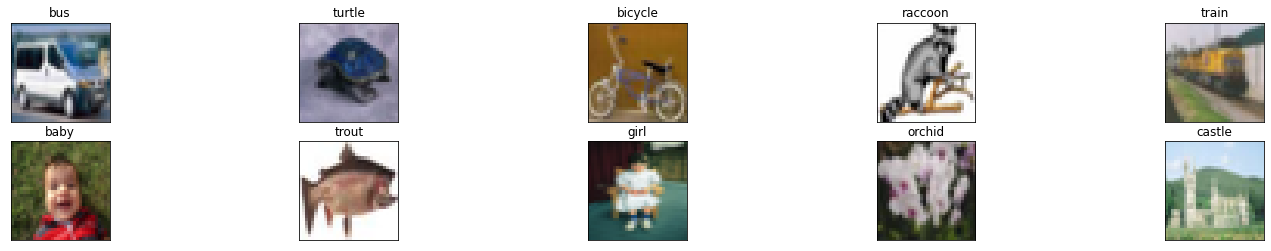

In [136]:
#randomly displaying images
fig=plt.figure(figsize=(25,4))
for i in range(1,11):
    ax=fig.add_subplot(2,5,i,xticks=[],yticks=[])
    index=np.random.randint(0,X_train.shape[0])
    ax.imshow(X_train[index],cmap='gray')
    ax.set_title(idx2lbl[y_train.iloc[index]].decode("utf-8"))

# Metric Functions

In [15]:
# Make the confusion matrix
def confusion_plot(y_test,y_pred):
    cmt = confusion_matrix(y_test,y_pred)
    plt.rcParams['figure.figsize'] = (20,18)
    sns.heatmap(cmt,fmt='',linewidth=0.01,cmap=sns.cubehelix_palette(as_cmap=True))
    plt.title("confusion matrix heat map")
    plt.xlabel("predicted")
    plt.ylabel("true")
    plt.show()


# generate classification report
def generate_classification_report(y_test,y_pred):
    report=pd.DataFrame.from_dict(classification_report(y_pred,y_test,output_dict=True)).T
    report['Label']=[(idx2lbl[y_train.iloc[int(x)]].decode("utf-8"))  if x.isdigit() else " " for x in report.index]
    report=report[['Label','f1-score','precision','recall','support']]
    pd.set_option('display.max_rows', report.shape[0]+1)
    return report

# ROC Curve
def plot_roc_curve(y_test,proba,pos_label):
    fpr, tpr, thresholds = roc_curve(y_test, proba[:,pos_label], pos_label= pos_label)
    roc_auc = roc_auc_score(y_test, proba, multi_class='ovr')

    plt.rcParams['figure.figsize'] = (10,8)
    plt.plot(fpr, tpr,'k:',lw=5, label='average ROC curve (area = {0:0.2f})'.format(roc_auc))
    plt.plot([0 ,1],[0 ,1],'r')
    plt.legend(loc="lower right")
    plt.title('ROC Curve for {0}'.format(idx2lbl[y_train.iloc[int(pos_label)]].decode("utf-8")))
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()


# ROC Curve for all classes
def plot_roc_curve_all(y_test,proba,n_class):
    for i in range(n_class):
      fpr, tpr, thresholds = roc_curve(y_test, proba[:,i],pos_label= i)
      plt.plot(fpr, tpr,lw=1)
    plt.plot([0 ,1],[0 ,1],'r')
    plt.title('ROC Curve for all classes')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

# VGG16

In [16]:
#loading VGG16 with imagenet weigths
image_size=32
num_class=100
# model_vgg
model=VGG16(weights='imagenet',include_top=False,input_shape=(image_size,image_size,3))



58889256/58889256 [==============================] - 1s 0us/step


In [17]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="Adam", metrics=["sparse_categorical_accuracy"])

In [18]:
model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0     

In [19]:
model.save('/content/drive/MyDrive/ML/FullModel.h5')

In [20]:
model = load_model('/content/drive/MyDrive/ML/FullModel.h5')

# Full Model

In [ ]:
#get Feautre vectors from complete VGG16 network
X_train_features=model.predict(X_train).reshape(-1,512)
X_test_features=model.predict(X_test).reshape(-1,512)

63/63 [==============================] - 17s 267ms/step


In [ ]:
print(X_train_features.shape)
print(X_test_features.shape)

(10000, 512)
(2000, 512)


## Perceptron

In [ ]:
from sklearn.linear_model import Perceptron

In [ ]:
clf_p = Perceptron(tol=1e-2, random_state=1)
clf_p.fit(X_train_features, y_train)

Perceptron(random_state=1, tol=0.01)

In [ ]:
clf_p.n_features_in_

512

In [ ]:
fit_perceptron = clf_p.fit(X_train_features, y_train)

In [ ]:
y_eval_p= clf_p.predict(X_train_features)
proba_eval_p = clf_p.predict_proba(X_train_features)

In [ ]:
accuracy_score(y_train,y_eval_p)

0.5825

In [ ]:
y_pred_p= clf_p.predict(X_test_features)
proba_p = clf_p.predict_proba(X_test_features)

In [ ]:
y_eval_mlp= clf_p.predict(X_train_features)

In [ ]:
accuracy_score(y_test,y_pred_mlp)

0.2105

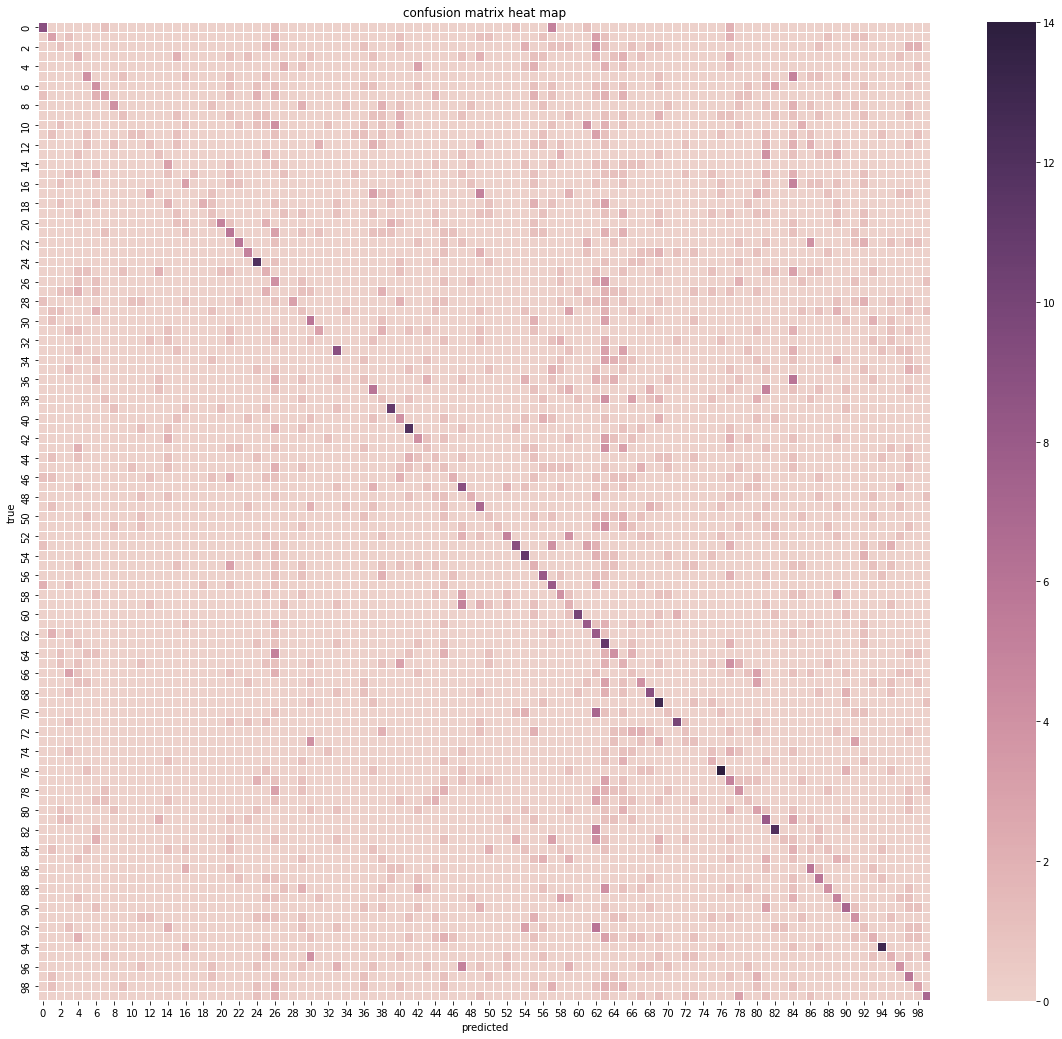

In [ ]:
confusion_plot(y_test,y_pred_p)

In [ ]:
generate_classification_report(y_test,y_pred_p)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,Label,f1-score,precision,recall,support
0,cattle,0.514286,0.450000,0.600000,15.0000
1,dinosaur,0.181818,0.157895,0.214286,14.0000
2,apple,0.058824,0.041667,0.100000,10.0000
3,boy,0.000000,0.000000,0.000000,15.0000
4,aquarium_fish,0.000000,0.000000,0.000000,24.0000
5,telephone,0.266667,0.222222,0.333333,12.0000
6,train,0.177778,0.173913,0.181818,22.0000
7,cup,0.181818,0.125000,0.333333,9.0000
8,cloud,0.275862,0.190476,0.500000,8.0000
9,elephant,0.076923,0.045455,0.250000,4.0000


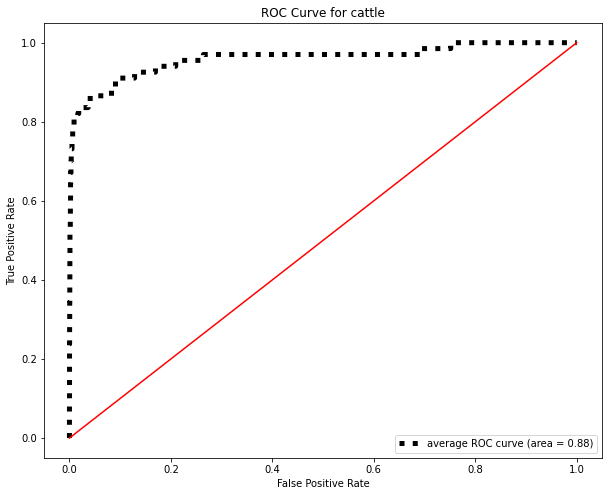

In [ ]:
plot_roc_curve(y_test,proba_p,0)

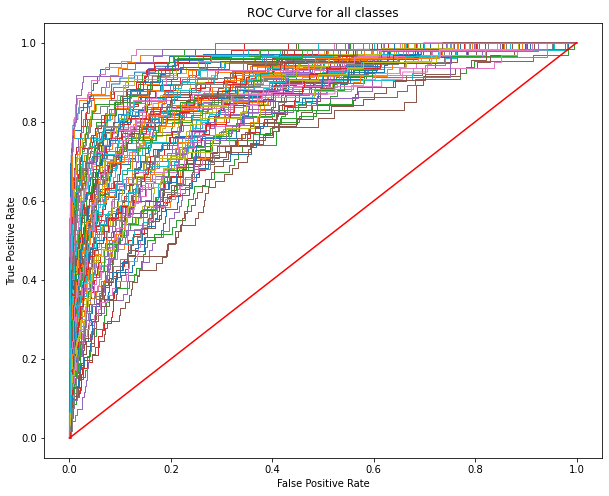

In [ ]:
plot_roc_curve_all(y_test,proba_p,100)

## Multi Layer Perceptron
  H1 = 4096 H2 = 1024 H3 = 512

In [ ]:
clf_mlp = MLPClassifier(solver='adam', 
                    alpha=3e-2,
                    hidden_layer_sizes=(4096,1024,512), 
                    random_state=1)

In [ ]:
fit_mlp = clf_mlp.fit(X_train_features, y_train)

In [ ]:
with open('drive/MyDrive/ML/MLP_4096_1024_512.mdl', 'wb') as f:
    pkl.dump(clf_mlp,f)
    f.close()

In [ ]:
with open('drive/MyDrive/ML/MLP_4096_1024_512.mdl', 'rb') as f:
    clf_mlp = pkl.load(f)
    f.close()

In [ ]:
y_eval_mlp= clf_mlp.predict(X_train_features)

In [ ]:
accuracy_score(y_train,y_eval_mlp)

0.5825

In [ ]:
y_pred_mlp=clf_mlp.predict(X_test_features)
proba_mlp = clf_mlp.predict_proba(X_test_features)

In [ ]:
accuracy_score(y_test,y_pred_mlp)

0.273

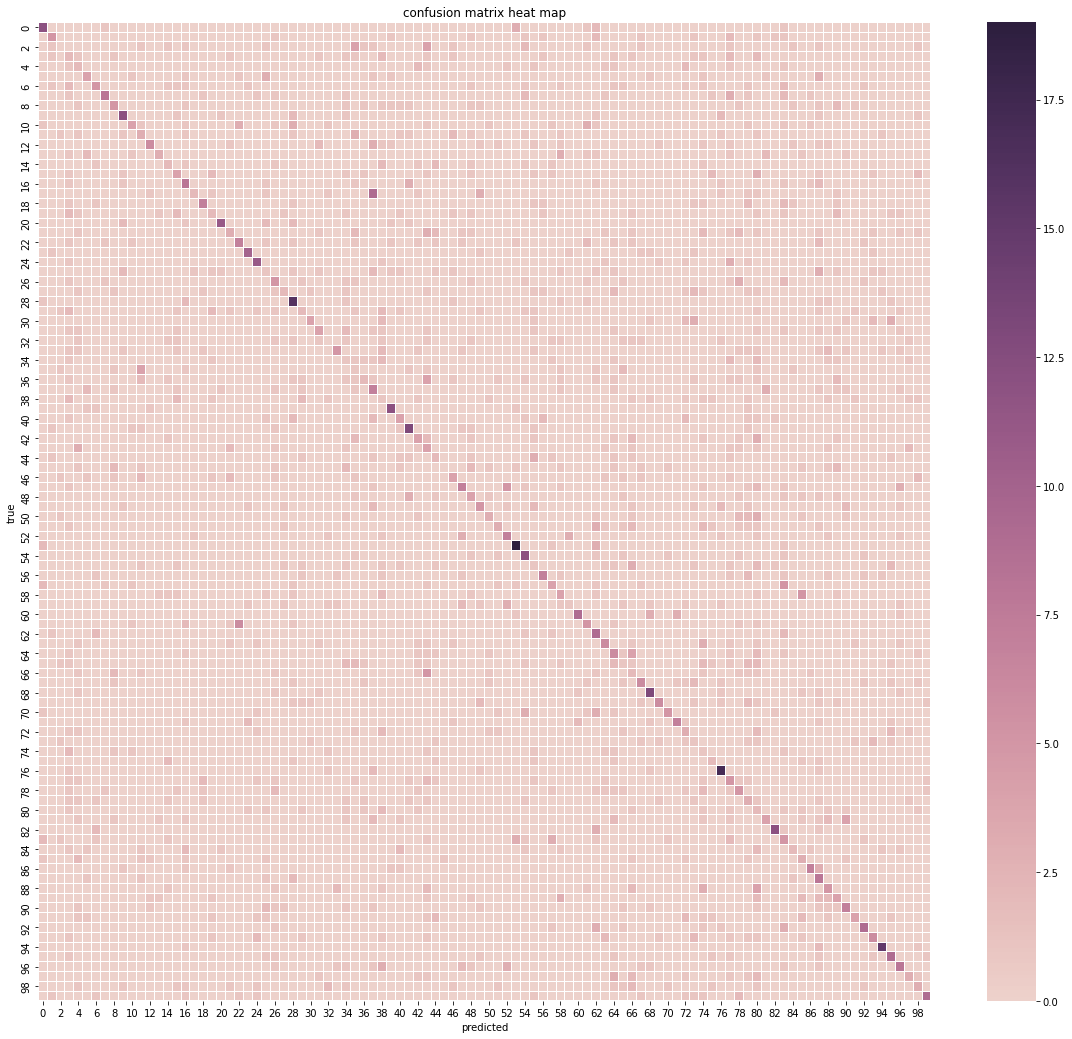

In [ ]:
confusion_plot(y_test,y_pred_mlp)

In [ ]:
generate_classification_report(y_test,y_pred_mlp)

,Label,f1-score,precision,recall,support
0,cattle,0.571429,0.600000,0.545455,22.000
1,dinosaur,0.312500,0.263158,0.384615,13.000
2,apple,0.000000,0.000000,0.000000,8.000
3,boy,0.065574,0.090909,0.051282,39.000
4,aquarium_fish,0.097561,0.142857,0.074074,27.000
5,telephone,0.258065,0.222222,0.307692,13.000
6,train,0.256410,0.217391,0.312500,16.000
7,cup,0.432432,0.333333,0.615385,13.000
8,cloud,0.263158,0.238095,0.294118,17.000
9,elephant,0.533333,0.545455,0.521739,23.000


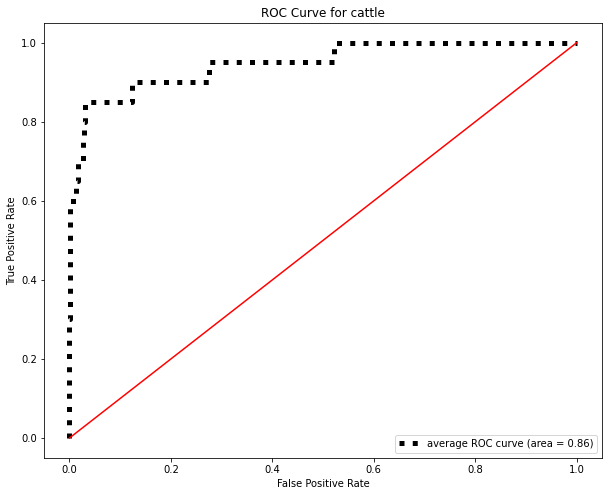

In [ ]:
plot_roc_curve(y_test,proba_mlp,0)

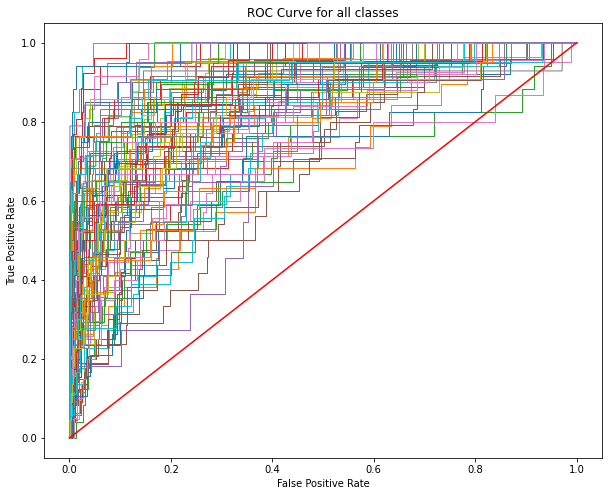

In [ ]:
plot_roc_curve_all(y_test,proba_mlp,100)

## Multi Layer Perceptron
  H1 = 256و H2 = 128

In [ ]:
clf_mlp = MLPClassifier(solver='adam', 
                    alpha=3e-2,
                    hidden_layer_sizes=(256,128), 
                    random_state=1)

In [ ]:
fit_mlp = clf_mlp.fit(X_train_features, y_train)

In [ ]:
with open('drive/MyDrive/ML/MLP_256_128.mdl', 'wb') as f:
    pkl.dump(clf_mlp,f)
    f.close()

In [ ]:
with open('drive/MyDrive/ML/MLP_256_128.mdl', 'rb') as f:
    clf_mlp = pkl.load(f)
    f.close()

In [ ]:
accuracy_score(y_train,y_eval_mlp)

1.0

In [ ]:
y_pred_mlp=clf_mlp.predict(X_test_features)
proba_mlp = clf_mlp.predict_proba(X_test_features)

In [ ]:
accuracy_score(y_test,y_pred_mlp)

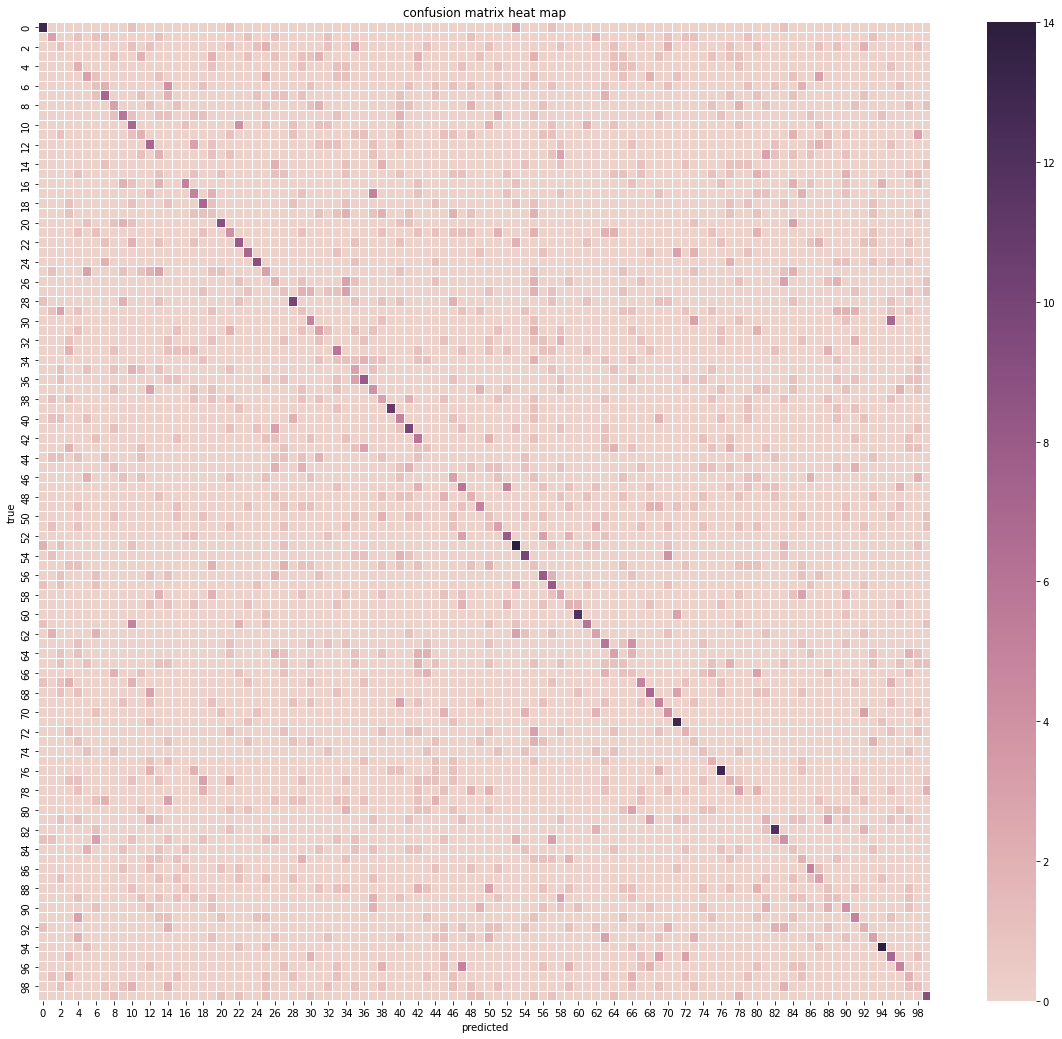

In [ ]:
confusion_plot(y_test,y_pred_mlp)

In [ ]:
generate_classification_report(y_test,y_pred_mlp)

,Label,f1-score,precision,recall,support
0,cattle,0.634146,0.650000,0.619048,21.000
1,dinosaur,0.181818,0.157895,0.214286,14.000
2,apple,0.046512,0.041667,0.052632,19.000
3,boy,0.000000,0.000000,0.000000,16.000
4,aquarium_fish,0.105263,0.142857,0.083333,24.000
5,telephone,0.176471,0.166667,0.187500,16.000
6,train,0.050000,0.043478,0.058824,17.000
7,cup,0.333333,0.291667,0.388889,18.000
8,cloud,0.162162,0.142857,0.187500,16.000
9,elephant,0.300000,0.272727,0.333333,18.000


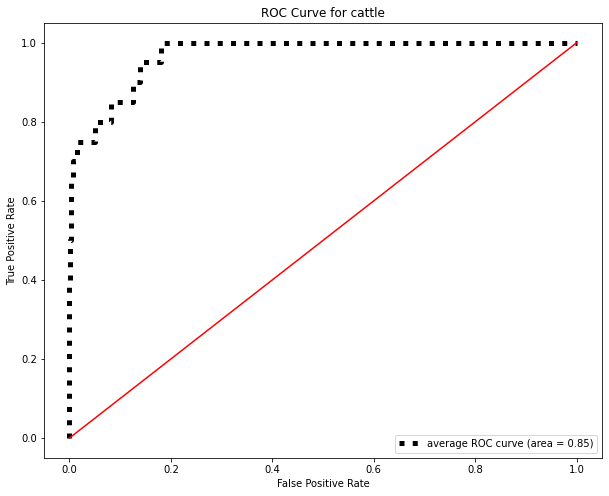

In [ ]:
plot_roc_curve(y_test,proba_mlp,0)

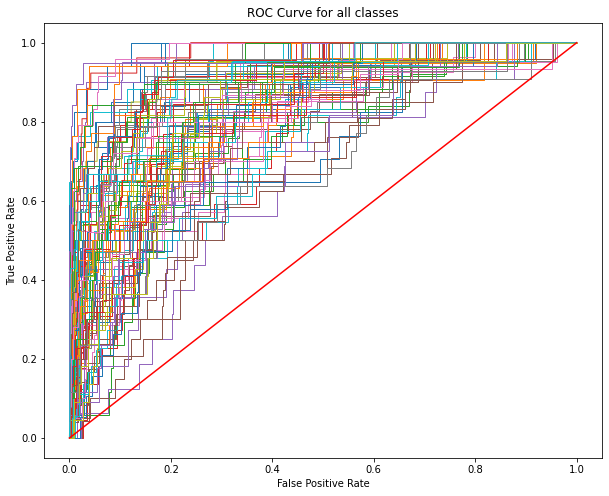

In [ ]:
plot_roc_curve_all(y_test,proba_mlp,100)

## Multi Layer Perceptron
  H1 = 1024 H2 = 512

In [ ]:
clf_mlp = MLPClassifier(solver='adam', 
                    alpha=3e-2,
                    hidden_layer_sizes=(1024,512), 
                    random_state=1)

In [ ]:
fit_mlp = clf_mlp.fit(X_train_features, y_train)

In [ ]:
with open('drive/MyDrive/ML/MLP_1024_512.mdl', 'wb') as f:
    pkl.dump(clf_mlp,f)
    f.close()

In [ ]:
with open('drive/MyDrive/ML/MLP_1024_512.mdl', 'rb') as f:
    clf_mlp = pkl.load(f)
    f.close()

In [ ]:
y_eval_mlp= clf_mlp.predict(X_train_features)

In [ ]:
accuracy_score(y_train,y_eval_mlp)

1.0

In [ ]:
y_pred_mlp=clf_mlp.predict(X_test_features)
proba_mlp = clf_mlp.predict_proba(X_test_features)

In [ ]:
accuracy_score(y_test,y_pred_mlp)

0.27

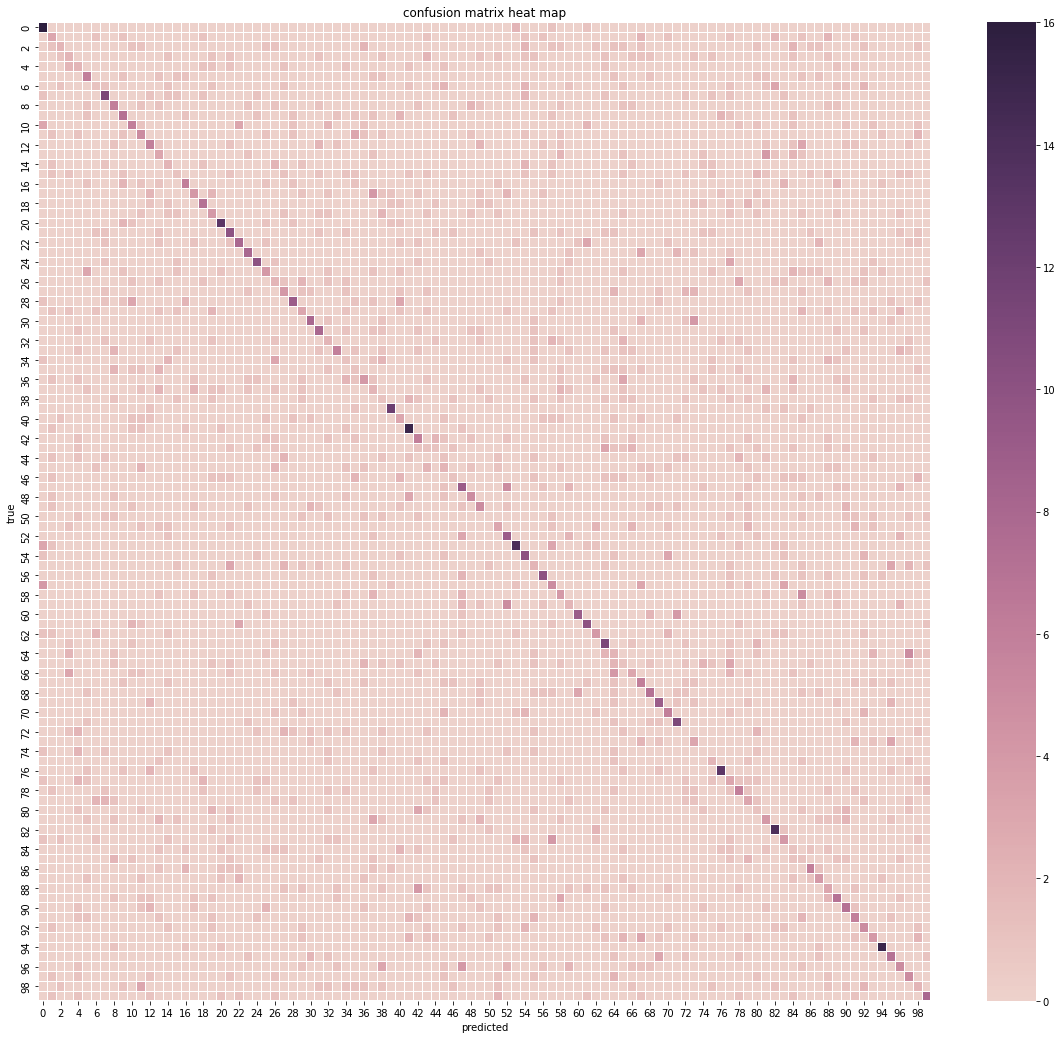

In [ ]:
confusion_plot(y_test,y_pred_mlp)

In [ ]:
generate_classification_report(y_test,y_pred_mlp)

,Label,f1-score,precision,recall,support
0,cattle,0.592593,0.800000,0.470588,34.00
1,dinosaur,0.153846,0.157895,0.150000,20.00
2,apple,0.129032,0.083333,0.285714,7.00
3,boy,0.111111,0.090909,0.142857,14.00
4,aquarium_fish,0.111111,0.142857,0.090909,22.00
5,telephone,0.315789,0.333333,0.300000,20.00
6,train,0.060606,0.043478,0.100000,10.00
7,cup,0.448980,0.458333,0.440000,25.00
8,cloud,0.279070,0.285714,0.272727,22.00
9,elephant,0.333333,0.318182,0.350000,20.00


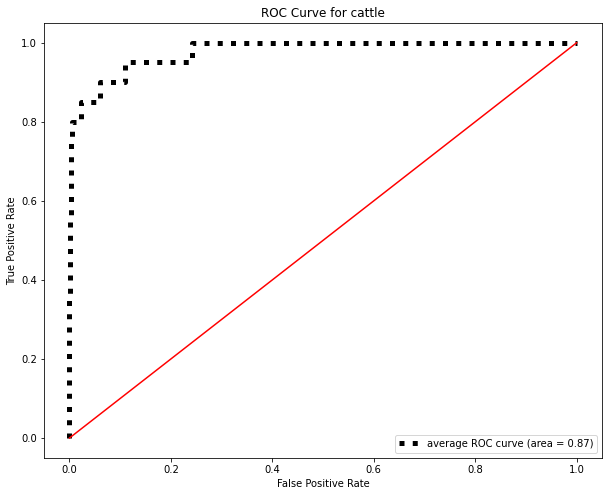

In [ ]:
plot_roc_curve(y_test,proba_mlp,0)

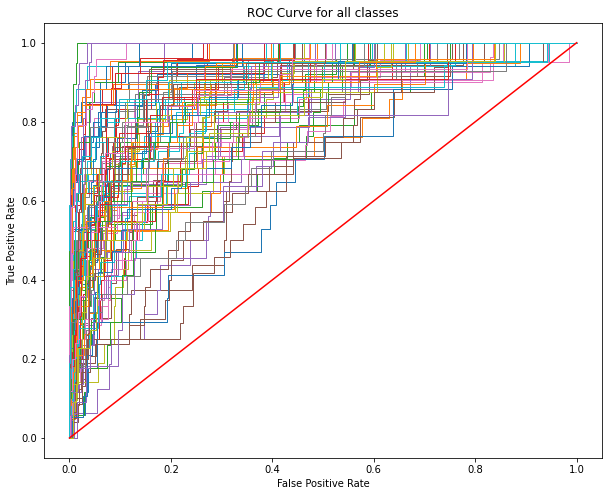

In [ ]:
plot_roc_curve_all(y_test,proba_mlp,100)

## SVM
C = 10

In [ ]:
clf_svm = SVC(C = 10,
              kernel='rbf', 
              gamma = 'scale',
              random_state=1,
              decision_function_shape='ovr',
              probability=True,)

In [ ]:
fit_svm = clf_svm.fit(X_train_features, y_train)

In [ ]:
with open('drive/MyDrive/ML/svm_rbf_C_10.mdl', 'wb') as f:
    pkl.dump(fit_svm,f)
    f.close()

In [ ]:
with open('drive/MyDrive/ML/svm_rbf_C_10.mdl', 'rb') as f:
    clf_svm = pkl.load(f)
    f.close()

In [ ]:
y_eval_svm= clf_svm.predict(X_train_features)

In [ ]:
accuracy_score(y_train,y_eval_svm)

0.9976

In [ ]:
y_pred_svm=clf_svm.predict(X_test_features)
proba_svm = clf_svm.predict_proba(X_test_features)

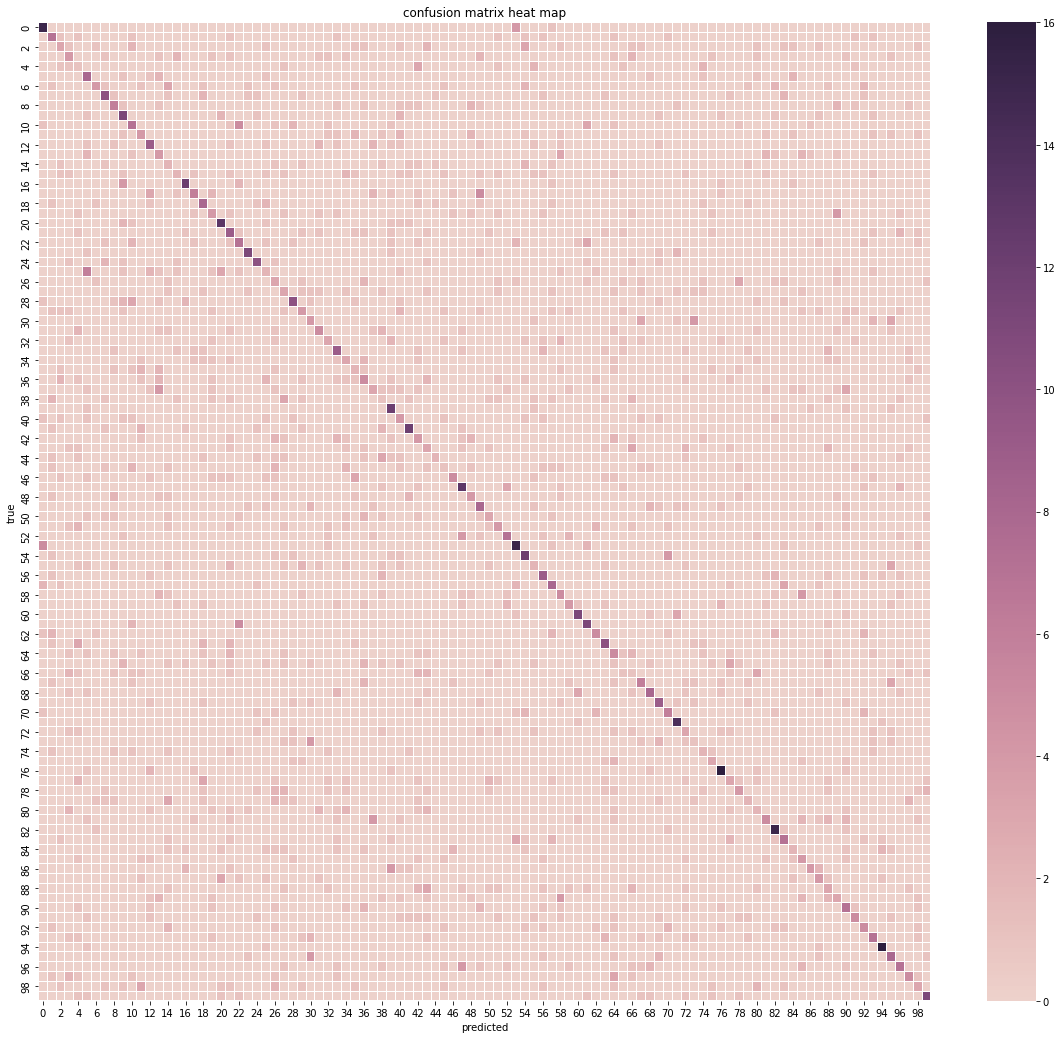

In [ ]:
confusion_plot(y_test,y_pred_svm)

In [ ]:
generate_classification_report(y_test,y_pred_svm)

,Label,f1-score,precision,recall,support
0,cattle,0.638298,0.750000,0.555556,27.000
1,dinosaur,0.318182,0.368421,0.280000,25.000
2,apple,0.150000,0.125000,0.187500,16.000
3,boy,0.181818,0.181818,0.181818,22.000
4,aquarium_fish,0.052632,0.071429,0.041667,24.000
5,telephone,0.320000,0.444444,0.250000,32.000
6,train,0.242424,0.173913,0.400000,10.000
7,cup,0.425532,0.416667,0.434783,23.000
8,cloud,0.300000,0.285714,0.315789,19.000
9,elephant,0.415094,0.500000,0.354839,31.000


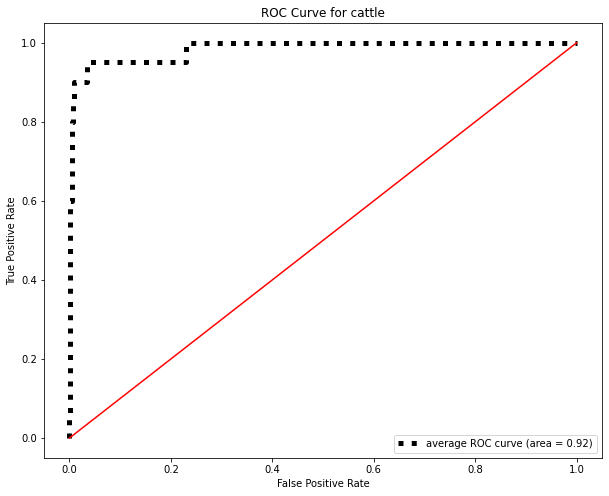

In [ ]:
plot_roc_curve(y_test,proba_svm,0)

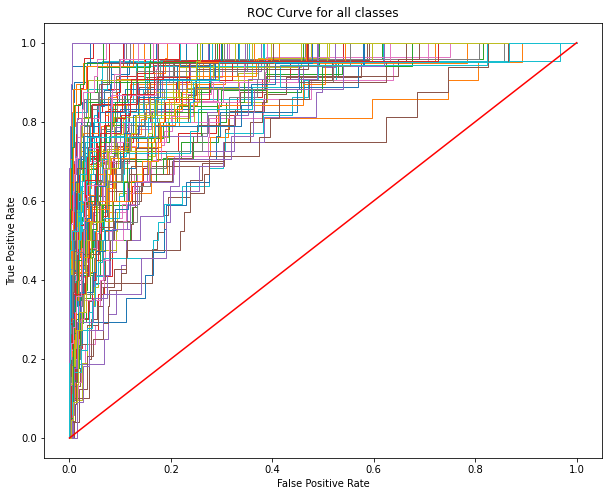

In [ ]:
plot_roc_curve_all(y_test,proba_svm,100)

## SVM
C = 100

In [ ]:
clf_svm = SVC(C = 100,
              kernel='rbf', 
              gamma = 'scale',
              random_state=1,
              decision_function_shape='ovr',
              probability=True,)

In [ ]:
fit_svm = clf_svm.fit(X_train_features, y_train)

In [ ]:
with open('drive/MyDrive/ML/svm_rbf_C_100.mdl', 'wb') as f:
    pkl.dump(fit_svm,f)
    f.close()

In [ ]:
with open('drive/MyDrive/ML/svm_rbf_C_100.mdl', 'rb') as f:
    clf_svm = pkl.load(f)
    f.close()

In [ ]:
y_eval_svm= clf_svm.predict(X_train_features)

In [ ]:
accuracy_score(y_train,y_eval_svm)

1.0

In [ ]:
y_pred_svm=clf_svm.predict(X_test_features)
proba_svm = clf_svm.predict_proba(X_test_features)

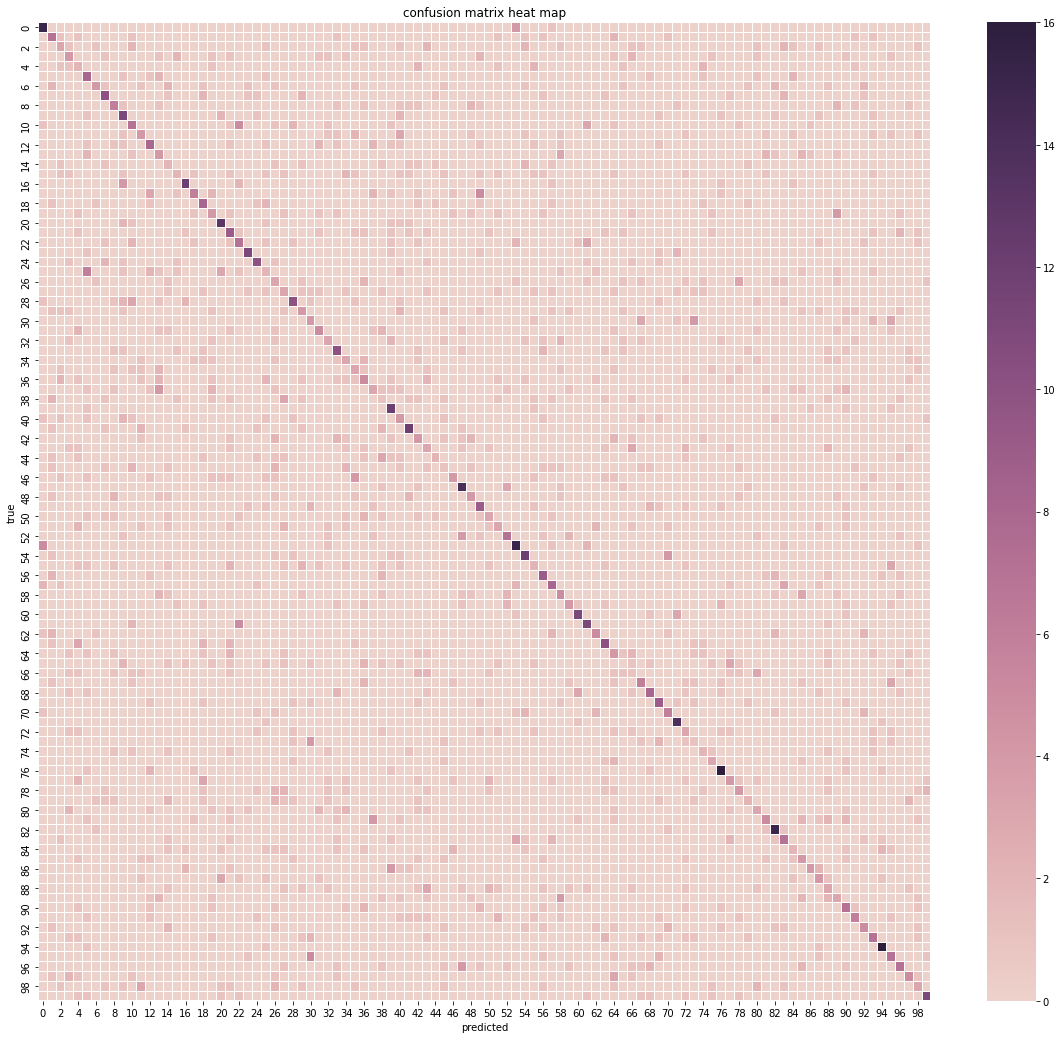

In [ ]:
confusion_plot(y_test,y_pred_svm)

In [ ]:
generate_classification_report(y_test,y_pred_svm)

,Label,f1-score,precision,recall,support
0,cattle,0.638298,0.750000,0.555556,27.0000
1,dinosaur,0.311111,0.368421,0.269231,26.0000
2,apple,0.150000,0.125000,0.187500,16.0000
3,boy,0.190476,0.181818,0.200000,20.0000
4,aquarium_fish,0.102564,0.142857,0.080000,25.0000
5,telephone,0.320000,0.444444,0.250000,32.0000
6,train,0.242424,0.173913,0.400000,10.0000
7,cup,0.425532,0.416667,0.434783,23.0000
8,cloud,0.300000,0.285714,0.315789,19.0000
9,elephant,0.392857,0.500000,0.323529,34.0000


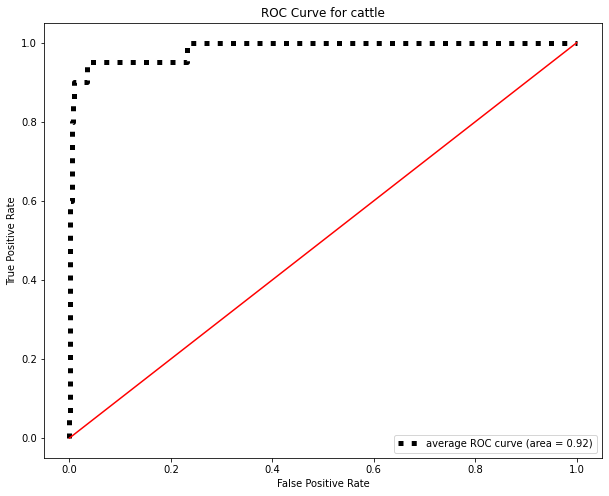

In [ ]:
plot_roc_curve(y_test,proba_svm,0)

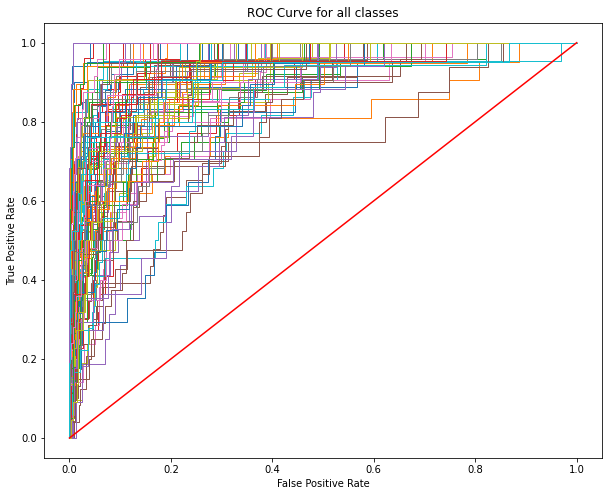

In [ ]:
plot_roc_curve_all(y_test,proba_svm,100)

## Deceision Tree

In [ ]:
clf_dt = DecisionTreeClassifier(criterion = "gini",
                                min_samples_split = 2)

In [ ]:
clf_dt.fit(X_train_features, y_train)

DecisionTreeClassifier()

In [ ]:
with open('drive/MyDrive/ML/dt_512.mdl', 'wb') as f:
    pkl.dump(clf_dt,f)
    f.close()

In [ ]:
with open('drive/MyDrive/ML/dt_512.mdl', 'rb') as f:
    clf_dt = pkl.load(f)
    f.close()

In [ ]:
y_eval_dt= clf_dt.predict(X_train_features)

In [ ]:
accuracy_score(y_train,y_eval_dt)

1.0

In [ ]:
y_pred_dt=clf_dt.predict(X_test_features)
proba_dt = clf_dt.predict_proba(X_test_features)

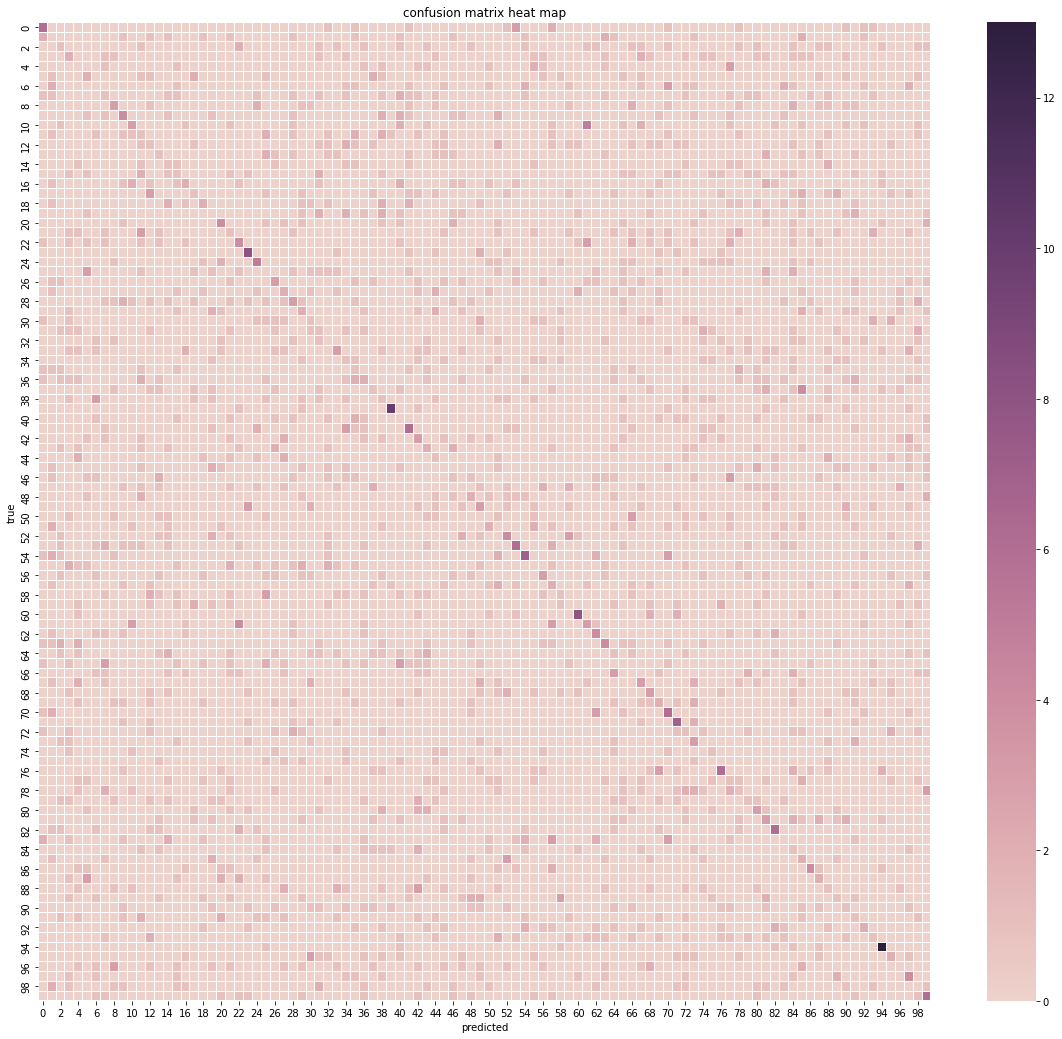

In [ ]:
confusion_plot(y_test,y_pred_dt)

In [ ]:
generate_classification_report(y_test,y_pred_dt)

,Label,f1-score,precision,recall,support
0,cattle,0.300000,0.300000,0.300000,20.0000
1,dinosaur,0.000000,0.000000,0.000000,26.0000
2,apple,0.047619,0.041667,0.055556,18.0000
3,boy,0.085106,0.090909,0.080000,25.0000
4,aquarium_fish,0.000000,0.000000,0.000000,23.0000
5,telephone,0.108108,0.111111,0.105263,19.0000
6,train,0.000000,0.000000,0.000000,17.0000
7,cup,0.042553,0.041667,0.043478,23.0000
8,cloud,0.157895,0.142857,0.176471,17.0000
9,elephant,0.186047,0.181818,0.190476,21.0000


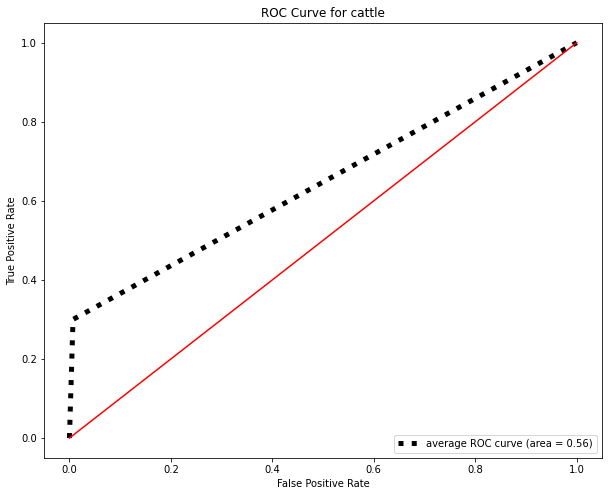

In [ ]:
plot_roc_curve(y_test,proba_dt,0)

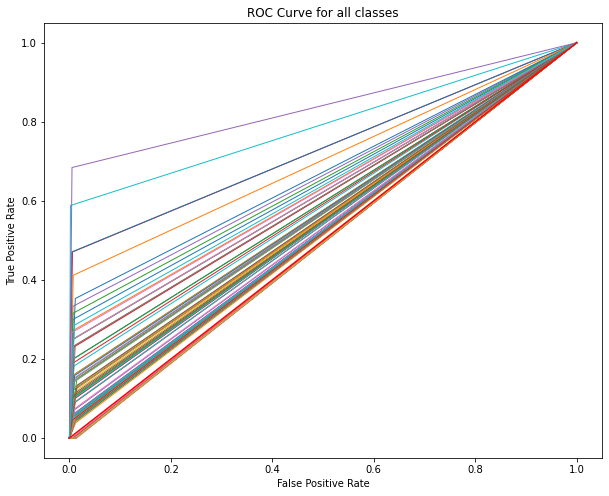

In [ ]:
plot_roc_curve_all(y_test,proba_dt,num_class)

# ADD LAYER TO VGG16

In [83]:
base_model = VGG16(weights='imagenet',include_top=False,input_shape=(image_size,image_size,3))
# Freeze the pre-trained model weights
base_model.trainable = True

for layer in base_model.layers[:100]:
  layer.trainable =  False
  
# Trainable classification head
maxpool_layer = GlobalMaxPooling2D()
avgpool_layer = GlobalAveragePooling2D()
dense_extra_1 = Dense(units=512, activation='relu')
dense_extra_2 = Dense(units=256, activation='relu')
prediction_layer = Dense(units=100, activation='softmax')
# Layer classification head with feature detector
model = Sequential([
    base_model,
    maxpool_layer,
    dense_extra_1,
    dense_extra_2,
    prediction_layer
])
num_epochs = 10
fine_tune_epochs = 30
total_epochs =  num_epochs + fine_tune_epochs

In [84]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 1, 1, 512)         14714688  
                                                                 
 global_max_pooling2d_5 (Glo  (None, 512)              0         
 balMaxPooling2D)                                                
                                                                 
 dense_15 (Dense)            (None, 512)               262656    
                                                                 
 dense_16 (Dense)            (None, 256)               131328    
                                                                 
 dense_17 (Dense)            (None, 100)               25700     
                                                                 
Total params: 15,134,372
Trainable params: 419,684
Non-trainable params: 14,714,688
____________________________________

In [85]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="Adam", metrics=["sparse_categorical_accuracy"])

In [87]:
hist= model.fit(X_train, y_train, epochs=40,  validation_data=(X_test, y_test))

Epoch 1/40
335/335 [==============================] - 5s 13ms/step - loss: 4.9618 - sparse_categorical_accuracy: 0.0774 - val_loss: 3.8767 - val_sparse_categorical_accuracy: 0.1500
Epoch 2/40
335/335 [==============================] - 4s 11ms/step - loss: 3.5386 - sparse_categorical_accuracy: 0.1885 - val_loss: 3.4097 - val_sparse_categorical_accuracy: 0.2110
Epoch 3/40
335/335 [==============================] - 4s 12ms/step - loss: 2.9638 - sparse_categorical_accuracy: 0.2708 - val_loss: 3.2199 - val_sparse_categorical_accuracy: 0.2640
Epoch 4/40
335/335 [==============================] - 4s 11ms/step - loss: 2.5040 - sparse_categorical_accuracy: 0.3581 - val_loss: 3.1037 - val_sparse_categorical_accuracy: 0.2940
Epoch 5/40
335/335 [==============================] - 4s 12ms/step - loss: 2.1370 - sparse_categorical_accuracy: 0.4363 - val_loss: 3.0328 - val_sparse_categorical_accuracy: 0.3530
Epoch 6/40
335/335 [==============================] - 4s 11ms/step - loss: 1.8040 - sparse_cate

In [88]:
# model.save('/content/drive/MyDrive/model_40_epoch_2.h5')

In [137]:
model = load_model('/content/drive/MyDrive/model_40_epoch_2.h5')

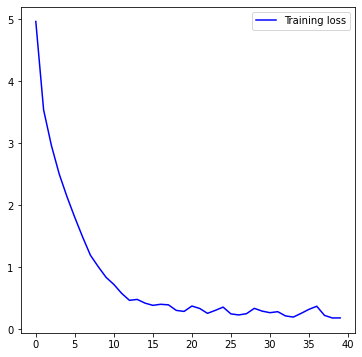

<Figure size 1440x1296 with 0 Axes>

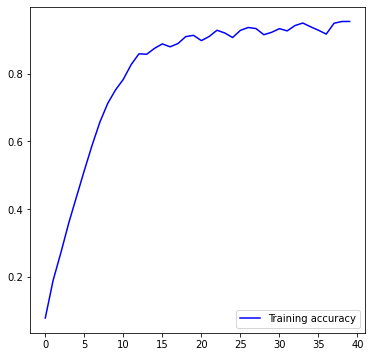

In [90]:
plt.figure(figsize=(6,6))
plt.plot(hist.history['loss'], color='b', label="Training loss")
plt.legend()
plt.show()

plt.figure()

plt.figure(figsize=(6,6))
plt.plot(hist.history['sparse_categorical_accuracy'], color='b', label="Training accuracy")
plt.legend(loc = "lower right")
plt.show()

In [138]:
y_train_pred = model.predict(X_train)
y_valid_pred = model.predict(X_test)

63/63 [==============================] - 1s 9ms/step


In [139]:
y_pred = np.argmax(y_valid_pred,axis=1)

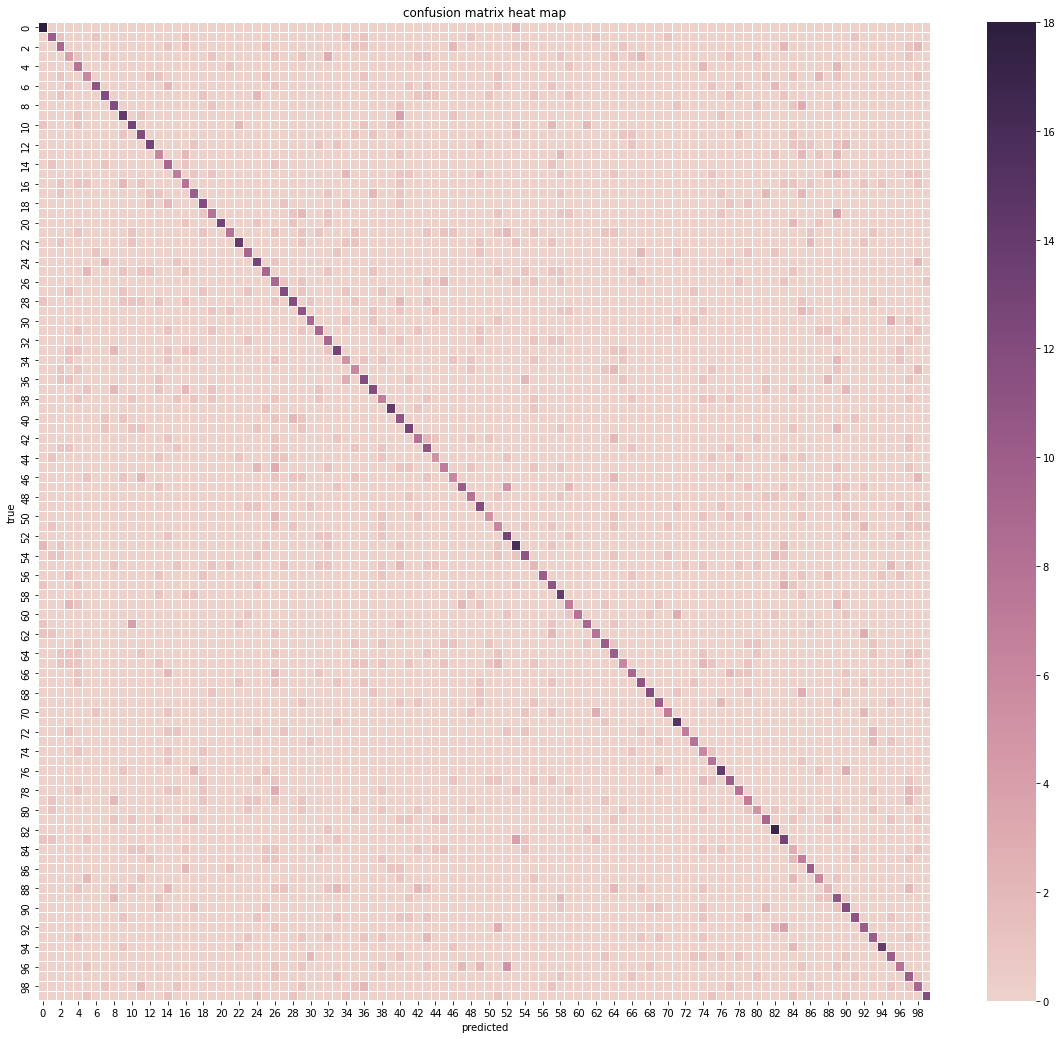

In [140]:
confusion_plot(y_test,y_pred)

In [141]:
generate_classification_report(y_test,y_pred)

,Label,f1-score,precision,recall,support
0,cattle,0.782609,0.900000,0.692308,26.000
1,dinosaur,0.540541,0.526316,0.555556,18.000
2,apple,0.391304,0.375000,0.409091,22.000
3,boy,0.210526,0.181818,0.250000,16.000
4,aquarium_fish,0.380952,0.571429,0.285714,28.000
5,telephone,0.352941,0.333333,0.375000,16.000
6,train,0.594595,0.478261,0.785714,14.000
7,cup,0.558140,0.500000,0.631579,19.000
8,cloud,0.545455,0.571429,0.521739,23.000
9,elephant,0.595745,0.636364,0.560000,25.000


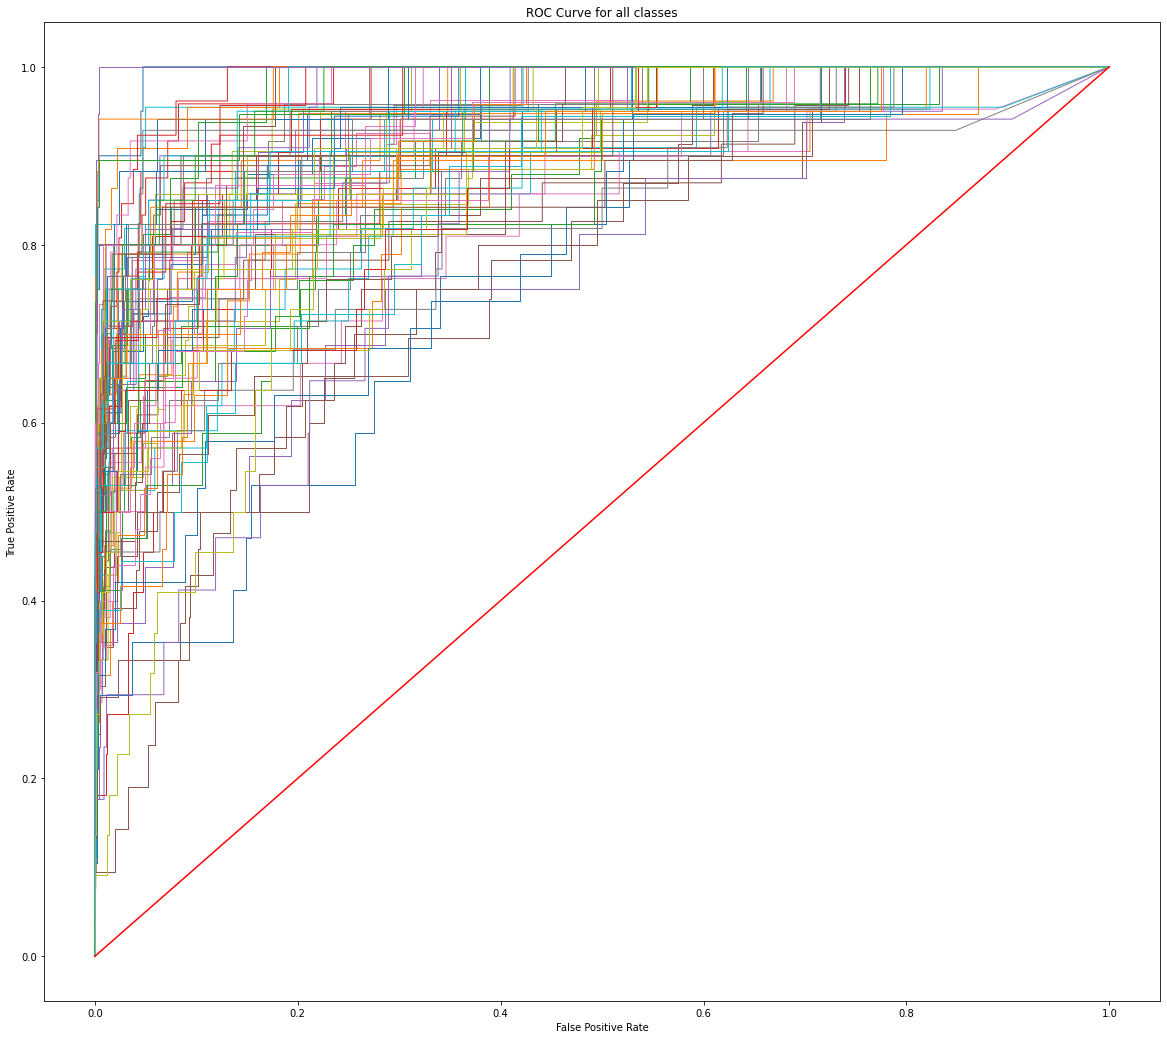

In [142]:
plot_roc_curve_all(y_test,y_valid_pred,100)

# Ommit  last layer

In [193]:
model = load_model('/content/drive/MyDrive/model_40_epoch_2.h5')

In [194]:
reduced_model=Sequential()
for layer in model.layers[:-1]:
    reduced_model.add(layer)

In [195]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 1, 1, 512)         14714688  
                                                                 
 global_max_pooling2d_5 (Glo  (None, 512)              0         
 balMaxPooling2D)                                                
                                                                 
 dense_15 (Dense)            (None, 512)               262656    
                                                                 
 dense_16 (Dense)            (None, 256)               131328    
                                                                 
 dense_17 (Dense)            (None, 100)               25700     
                                                                 
Total params: 15,134,372
Trainable params: 419,684
Non-trainable params: 14,714,688
____________________________________

In [196]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="Adam", metrics=["sparse_categorical_accuracy"])

In [197]:
# model.save('/content/drive/MyDrive/model_40_epoch_3.h5')

In [192]:
model = load_model('/content/drive/MyDrive/model_40_epoch_3.h5')

# Use Classifier

In [198]:
#get Feautre vectors from complete VGG16 network
X_train_features=model.predict(X_train)
X_test_features=model.predict(X_test)

63/63 [==============================] - 1s 8ms/step


In [199]:
print(X_train_features.shape)
print(X_test_features.shape)

(10000, 100)
(2000, 100)


## Perceptron

In [200]:
from sklearn.linear_model import Perceptron

In [201]:
clf_p = Perceptron(tol=1e-2, random_state=1)
clf_p.fit(X_train_features, y_train)

Perceptron(random_state=1, tol=0.01)

In [202]:
clf_p.n_features_in_

100

In [203]:
fit_perceptron = clf_p.fit(X_train_features, y_train)

In [205]:
y_eval_p= clf_p.predict(X_train_features)

In [206]:
accuracy_score(y_train,y_eval_p)

0.9564

In [207]:
y_pred_p= clf_p.predict(X_test_features)

In [208]:
y_eval_p= clf_p.predict(X_train_features)

In [209]:
accuracy_score(y_test,y_pred_p)

0.476

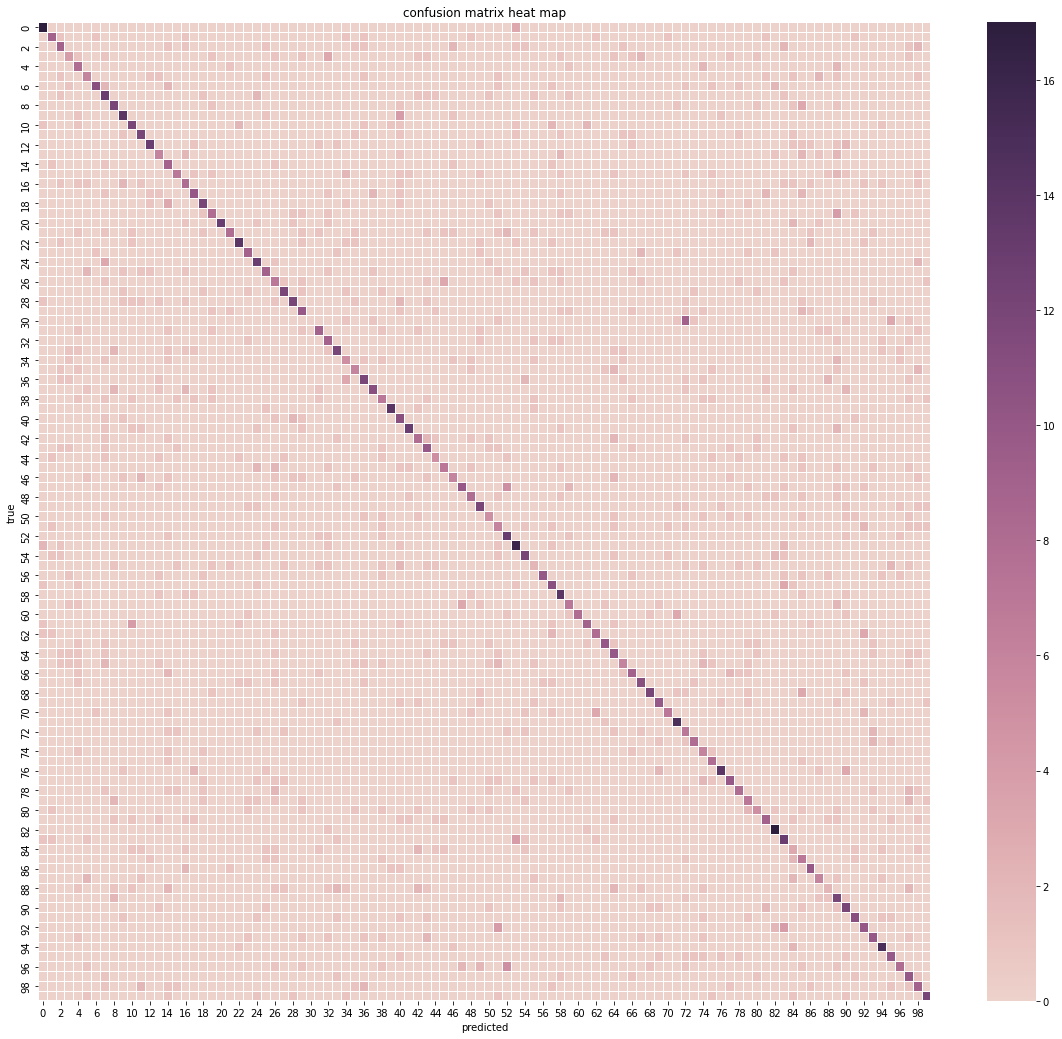

In [210]:
confusion_plot(y_test,y_pred_p)

In [211]:
generate_classification_report(y_test,y_pred_p)

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,Label,f1-score,precision,recall,support
0,cattle,0.755556,0.850000,0.680000,25.000
1,dinosaur,0.514286,0.473684,0.562500,16.000
2,apple,0.400000,0.375000,0.428571,21.000
3,boy,0.228571,0.181818,0.307692,13.000
4,aquarium_fish,0.390244,0.571429,0.296296,27.000
5,telephone,0.352941,0.333333,0.375000,16.000
6,train,0.594595,0.478261,0.785714,14.000
7,cup,0.419355,0.541667,0.342105,38.000
8,cloud,0.545455,0.571429,0.521739,23.000
9,elephant,0.608696,0.636364,0.583333,24.000


## Multi Layer Perceptron
  H1 = 100

In [217]:
clf_mlp = MLPClassifier(solver='adam', 
                    alpha=3e-2,
                    hidden_layer_sizes=(100), 
                    random_state=1)

In [220]:
fit_mlp = clf_mlp.fit(X_train_features, y_train)

In [221]:
with open('drive/MyDrive/ML/MLP_100_2.mdl', 'wb') as f:
    pkl.dump(clf_mlp,f)
    f.close()

In [222]:
with open('drive/MyDrive/ML/MLP_100_2.mdl', 'rb') as f:
    clf_mlp = pkl.load(f)
    f.close()

In [223]:
y_eval_mlp= clf_mlp.predict(X_train_features)

In [224]:
accuracy_score(y_train,y_eval_mlp)

0.968

In [225]:
y_pred_mlp=clf_mlp.predict(X_test_features)
proba_mlp = clf_mlp.predict_proba(X_test_features)

In [226]:
accuracy_score(y_test,y_pred_mlp)

0.484

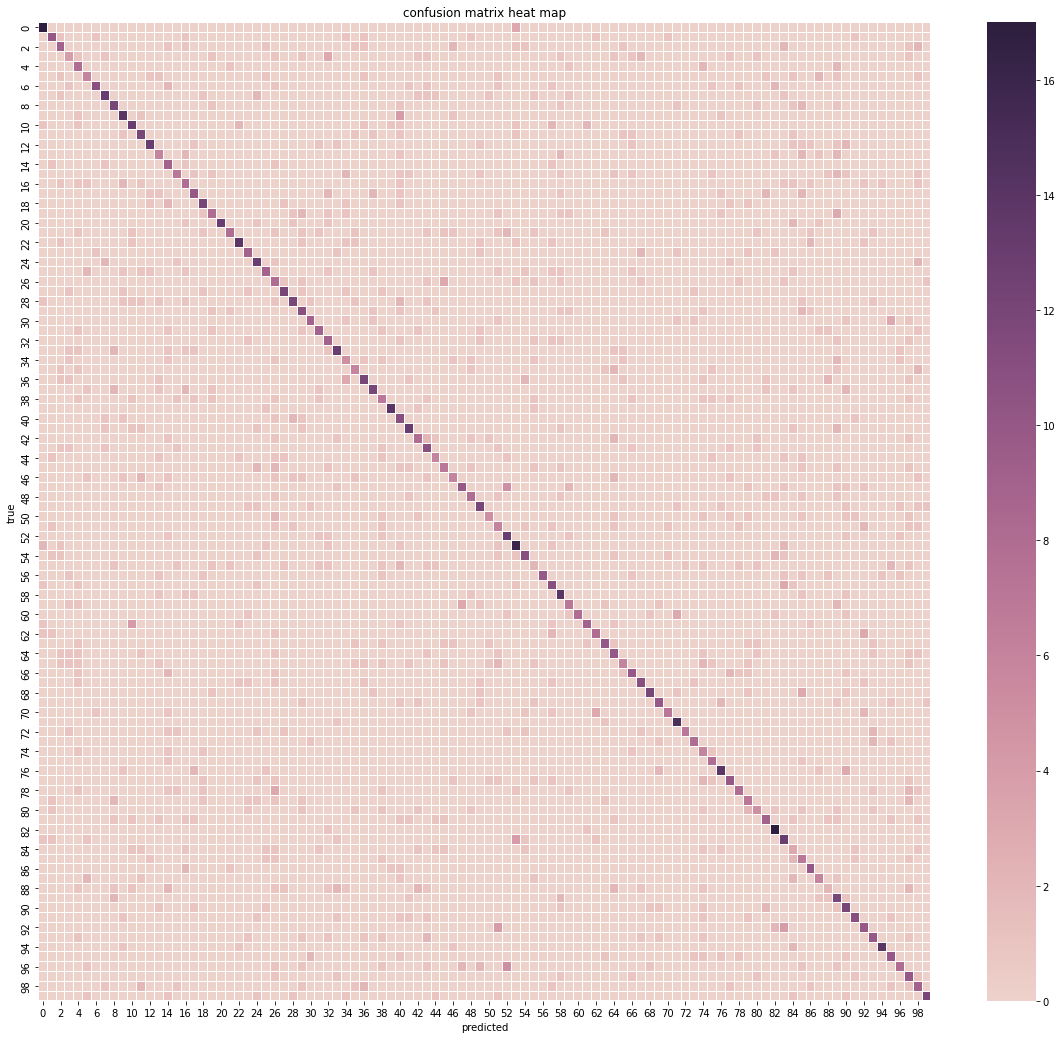

In [227]:
confusion_plot(y_test,y_pred_mlp)

In [228]:
generate_classification_report(y_test,y_pred_mlp)

,Label,f1-score,precision,recall,support
0,cattle,0.755556,0.850000,0.680000,25.000
1,dinosaur,0.540541,0.526316,0.555556,18.000
2,apple,0.400000,0.375000,0.428571,21.000
3,boy,0.216216,0.181818,0.266667,15.000
4,aquarium_fish,0.380952,0.571429,0.285714,28.000
5,telephone,0.352941,0.333333,0.375000,16.000
6,train,0.594595,0.478261,0.785714,14.000
7,cup,0.577778,0.541667,0.619048,21.000
8,cloud,0.545455,0.571429,0.521739,23.000
9,elephant,0.595745,0.636364,0.560000,25.000


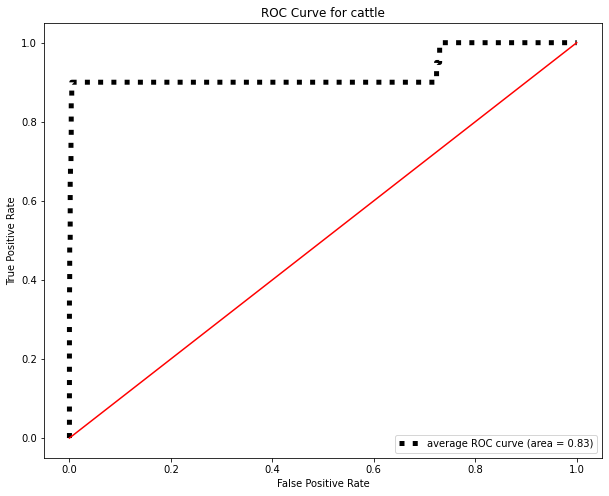

In [229]:
plot_roc_curve(y_test,proba_mlp,0)

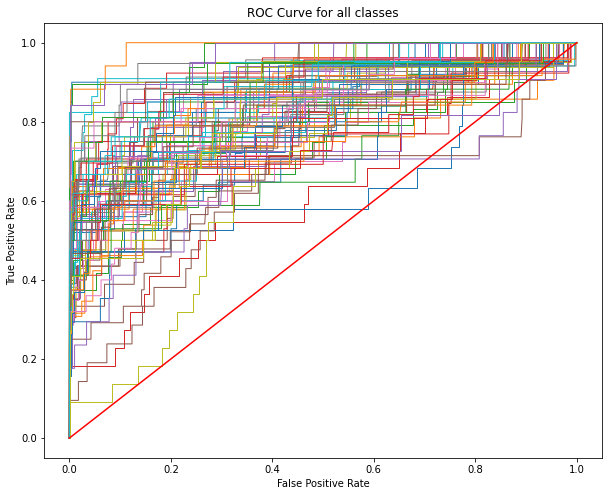

In [230]:
plot_roc_curve_all(y_test,proba_mlp,100)

## Multi Layer Perceptron
  H1 = 256و H2 = 128

In [231]:
clf_mlp = MLPClassifier(solver='adam', 
                    alpha=3e-2,
                    hidden_layer_sizes=(256,128), 
                    random_state=1)

In [ ]:
fit_mlp = clf_mlp.fit(X_train_features, y_train)

In [233]:
with open('drive/MyDrive/ML/MLP_256_128.mdl', 'wb') as f:
    pkl.dump(clf_mlp,f)
    f.close()

In [234]:
with open('drive/MyDrive/ML/MLP_256_128.mdl', 'rb') as f:
    clf_mlp = pkl.load(f)
    f.close()

In [235]:
accuracy_score(y_train,y_eval_mlp)

0.968

In [236]:
y_pred_mlp=clf_mlp.predict(X_test_features)
proba_mlp = clf_mlp.predict_proba(X_test_features)

In [237]:
accuracy_score(y_test,y_pred_mlp)

0.484

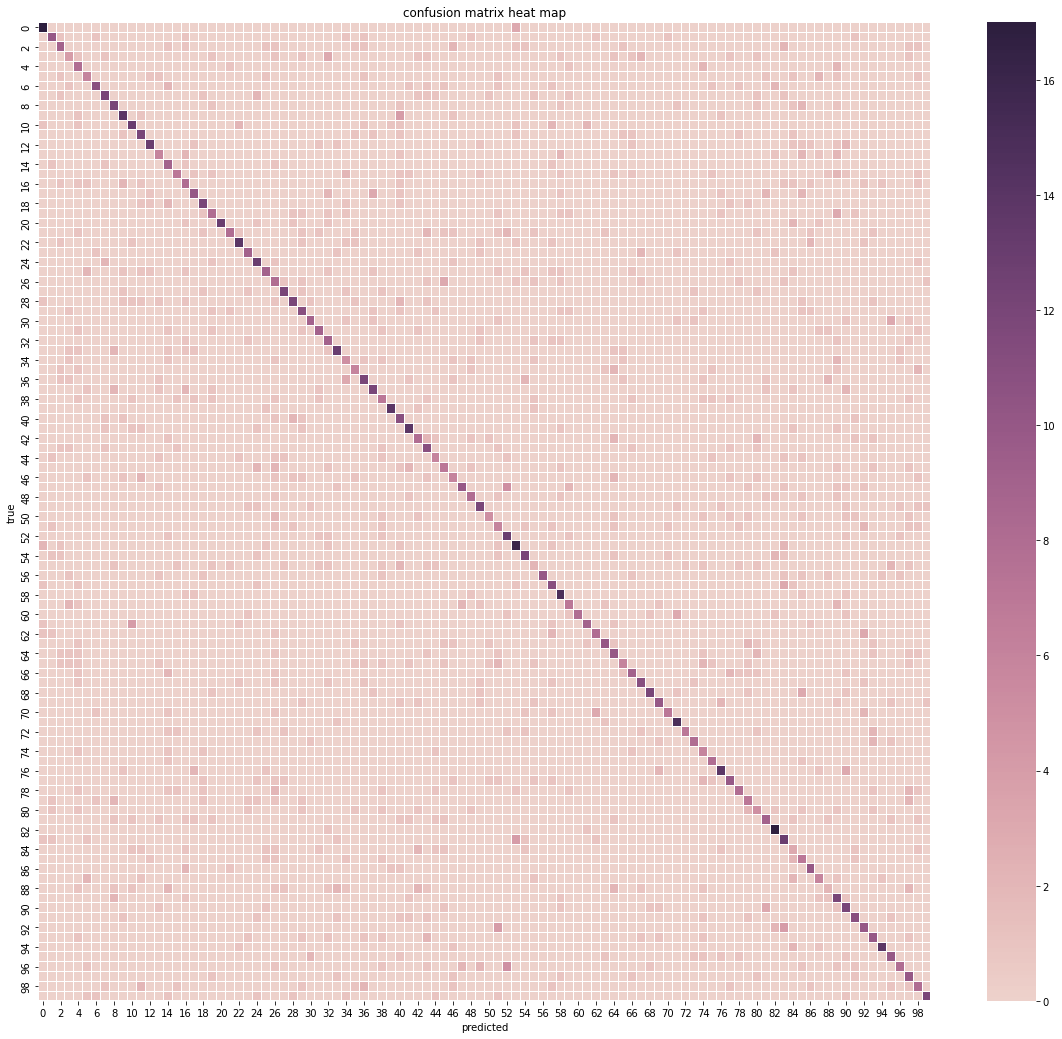

In [238]:
confusion_plot(y_test,y_pred_mlp)

In [239]:
generate_classification_report(y_test,y_pred_mlp)

,Label,f1-score,precision,recall,support
0,cattle,0.755556,0.850000,0.680000,25.000
1,dinosaur,0.540541,0.526316,0.555556,18.000
2,apple,0.400000,0.375000,0.428571,21.000
3,boy,0.216216,0.181818,0.266667,15.000
4,aquarium_fish,0.372093,0.571429,0.275862,29.000
5,telephone,0.352941,0.333333,0.375000,16.000
6,train,0.564103,0.478261,0.687500,16.000
7,cup,0.545455,0.500000,0.600000,20.000
8,cloud,0.545455,0.571429,0.521739,23.000
9,elephant,0.608696,0.636364,0.583333,24.000


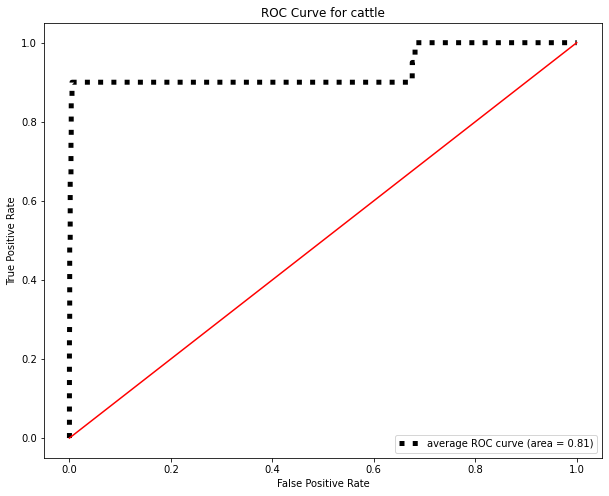

In [240]:
plot_roc_curve(y_test,proba_mlp,0)

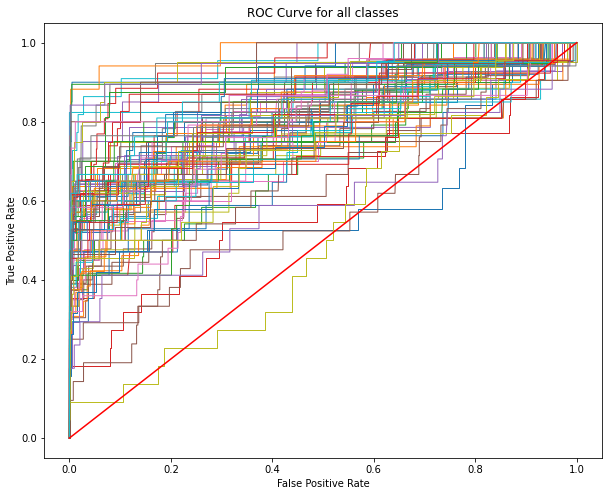

In [241]:
plot_roc_curve_all(y_test,proba_mlp,100)

## Multi Layer Perceptron
  H1 = 1024 H2 = 512

In [242]:
clf_mlp = MLPClassifier(solver='adam', 
                    alpha=3e-2,
                    hidden_layer_sizes=(1024,512), 
                    random_state=1)

In [ ]:
fit_mlp = clf_mlp.fit(X_train_features, y_train)

In [244]:
with open('drive/MyDrive/ML/MLP_1024_512.mdl', 'wb') as f:
    pkl.dump(clf_mlp,f)
    f.close()

In [245]:
with open('drive/MyDrive/ML/MLP_1024_512.mdl', 'rb') as f:
    clf_mlp = pkl.load(f)
    f.close()

In [246]:
y_eval_mlp= clf_mlp.predict(X_train_features)

In [247]:
accuracy_score(y_train,y_eval_mlp)

0.9736

In [248]:
y_pred_mlp=clf_mlp.predict(X_test_features)
proba_mlp = clf_mlp.predict_proba(X_test_features)

In [249]:
accuracy_score(y_test,y_pred_mlp)

0.4845

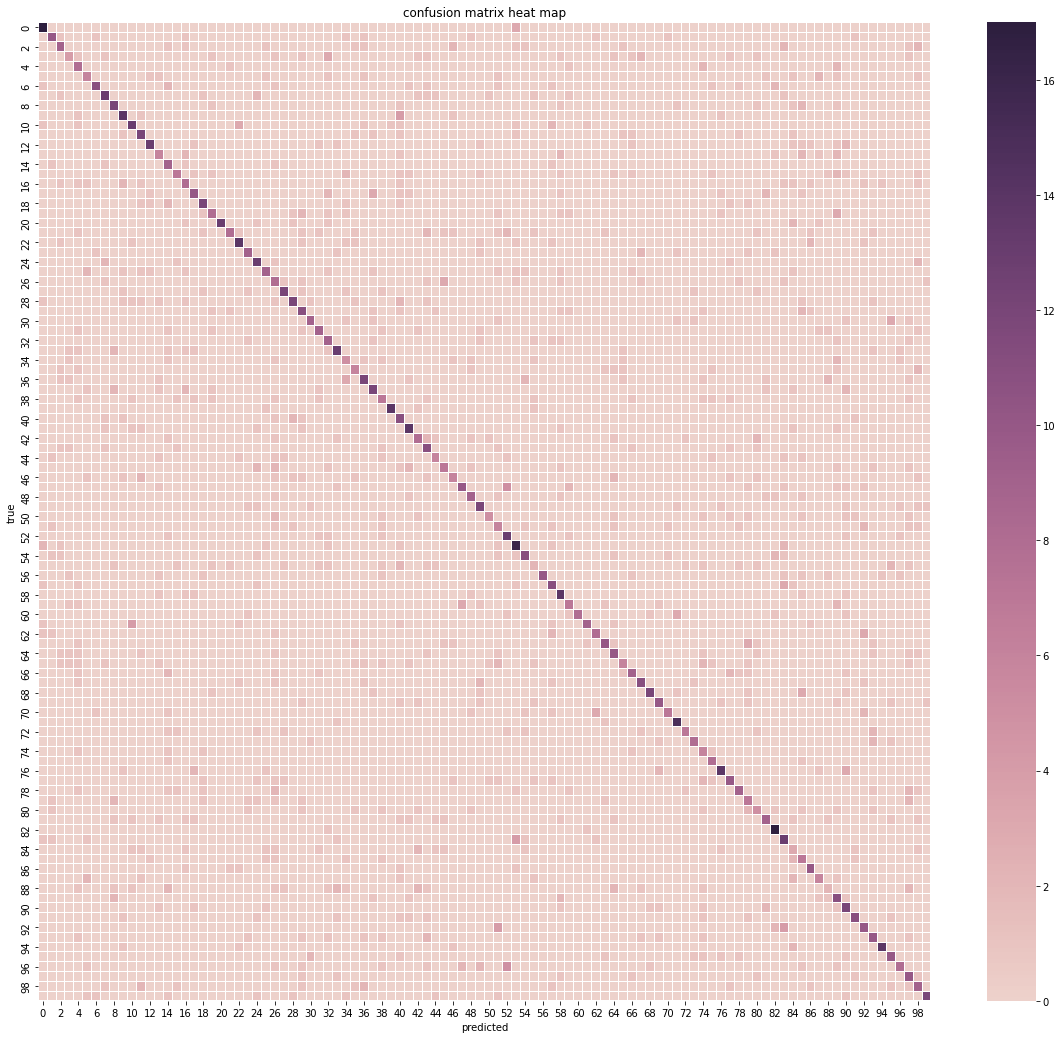

In [250]:
confusion_plot(y_test,y_pred_mlp)

In [251]:
generate_classification_report(y_test,y_pred_mlp)

,Label,f1-score,precision,recall,support
0,cattle,0.739130,0.850000,0.653846,26.0000
1,dinosaur,0.540541,0.526316,0.555556,18.0000
2,apple,0.409091,0.375000,0.450000,20.0000
3,boy,0.235294,0.181818,0.333333,12.0000
4,aquarium_fish,0.380952,0.571429,0.285714,28.0000
5,telephone,0.352941,0.333333,0.375000,16.0000
6,train,0.578947,0.478261,0.733333,15.0000
7,cup,0.553191,0.541667,0.565217,23.0000
8,cloud,0.545455,0.571429,0.521739,23.0000
9,elephant,0.595745,0.636364,0.560000,25.0000


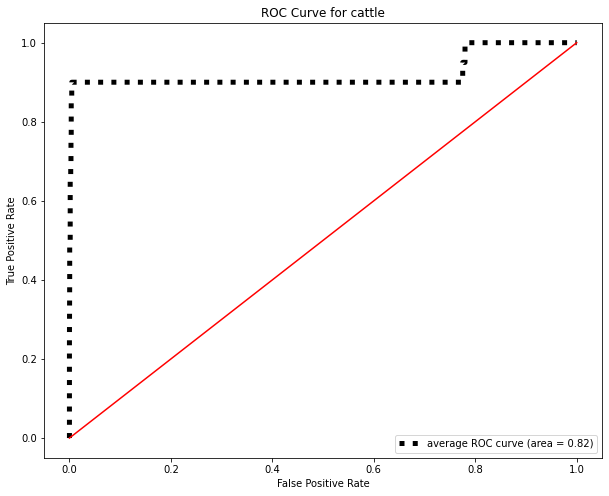

In [252]:
plot_roc_curve(y_test,proba_mlp,0)

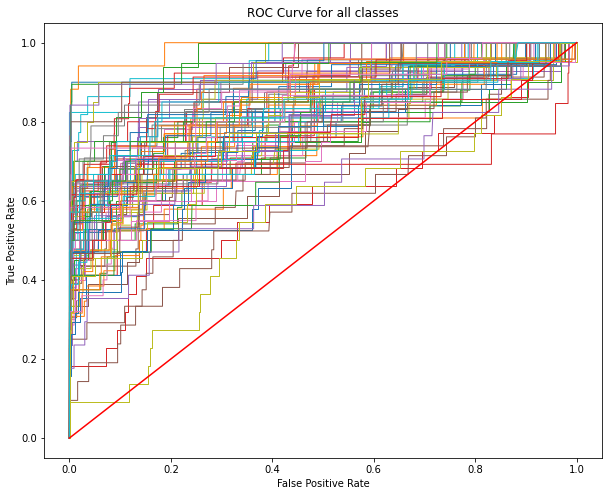

In [253]:
plot_roc_curve_all(y_test,proba_mlp,100)

## SVM
C = 10

In [254]:
clf_svm = SVC(C = 10,
              kernel='rbf', 
              gamma = 'scale',
              random_state=1,
              decision_function_shape='ovr',
              probability=True,)

In [255]:
fit_svm = clf_svm.fit(X_train_features, y_train)

In [256]:
with open('drive/MyDrive/ML/svm_rbf_C_10_2.mdl', 'wb') as f:
    pkl.dump(fit_svm,f)
    f.close()

In [257]:
with open('drive/MyDrive/ML/svm_rbf_C_10_2.mdl', 'rb') as f:
    clf_svm = pkl.load(f)
    f.close()

In [258]:
y_eval_svm= clf_svm.predict(X_train_features)

In [259]:
accuracy_score(y_train,y_eval_svm)

0.9779

In [260]:
y_pred_svm=clf_svm.predict(X_test_features)
proba_svm = clf_svm.predict_proba(X_test_features)

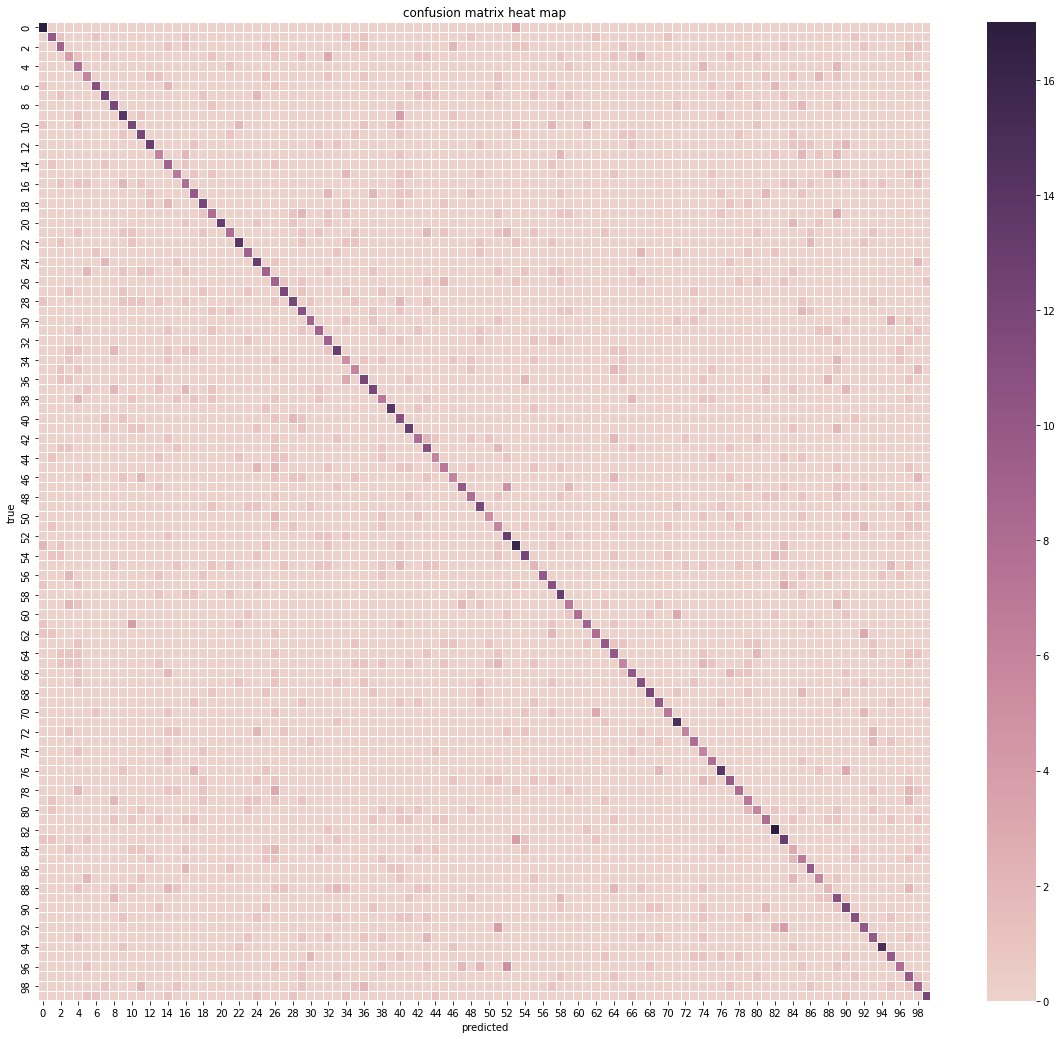

In [261]:
confusion_plot(y_test,y_pred_svm)

In [262]:
generate_classification_report(y_test,y_pred_svm)

,Label,f1-score,precision,recall,support
0,cattle,0.739130,0.850000,0.653846,26.000
1,dinosaur,0.540541,0.526316,0.555556,18.000
2,apple,0.409091,0.375000,0.450000,20.000
3,boy,0.205128,0.181818,0.235294,17.000
4,aquarium_fish,0.363636,0.571429,0.266667,30.000
5,telephone,0.352941,0.333333,0.375000,16.000
6,train,0.578947,0.478261,0.733333,15.000
7,cup,0.558140,0.500000,0.631579,19.000
8,cloud,0.545455,0.571429,0.521739,23.000
9,elephant,0.583333,0.636364,0.538462,26.000


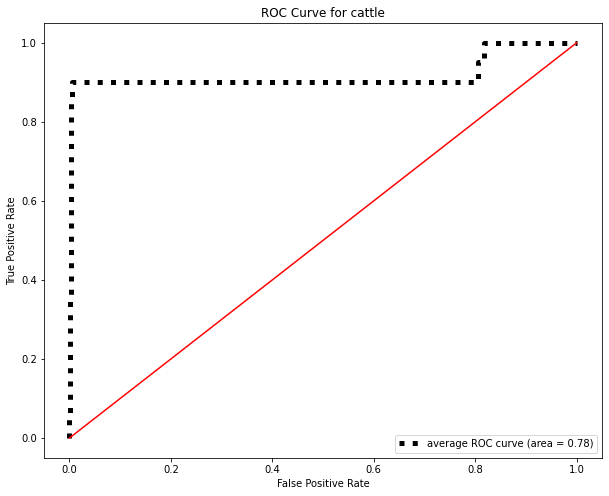

In [263]:
plot_roc_curve(y_test,proba_svm,0)

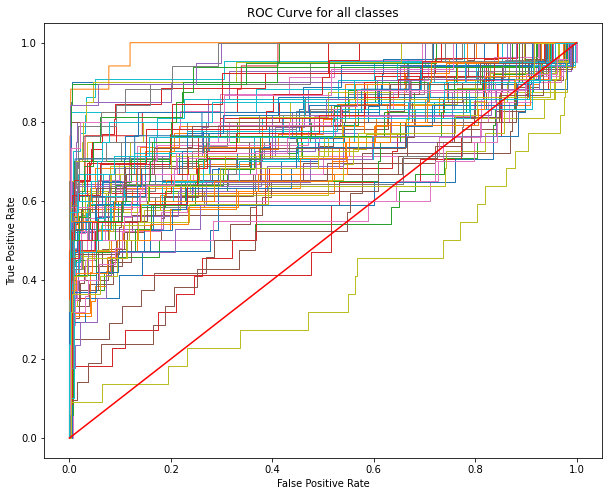

In [264]:
plot_roc_curve_all(y_test,proba_svm,100)

## SVM
C = 100

In [265]:
clf_svm = SVC(C = 100,
              kernel='rbf', 
              gamma = 'scale',
              random_state=1,
              decision_function_shape='ovr',
              probability=True,)

In [266]:
fit_svm = clf_svm.fit(X_train_features, y_train)

In [267]:
with open('drive/MyDrive/ML/svm_rbf_C_100.mdl', 'wb') as f:
    pkl.dump(fit_svm,f)
    f.close()

In [268]:
with open('drive/MyDrive/ML/svm_rbf_C_100.mdl', 'rb') as f:
    clf_svm = pkl.load(f)
    f.close()

In [269]:
y_eval_svm= clf_svm.predict(X_train_features)

In [270]:
accuracy_score(y_train,y_eval_svm)

0.9844

In [271]:
y_pred_svm=clf_svm.predict(X_test_features)
proba_svm = clf_svm.predict_proba(X_test_features)

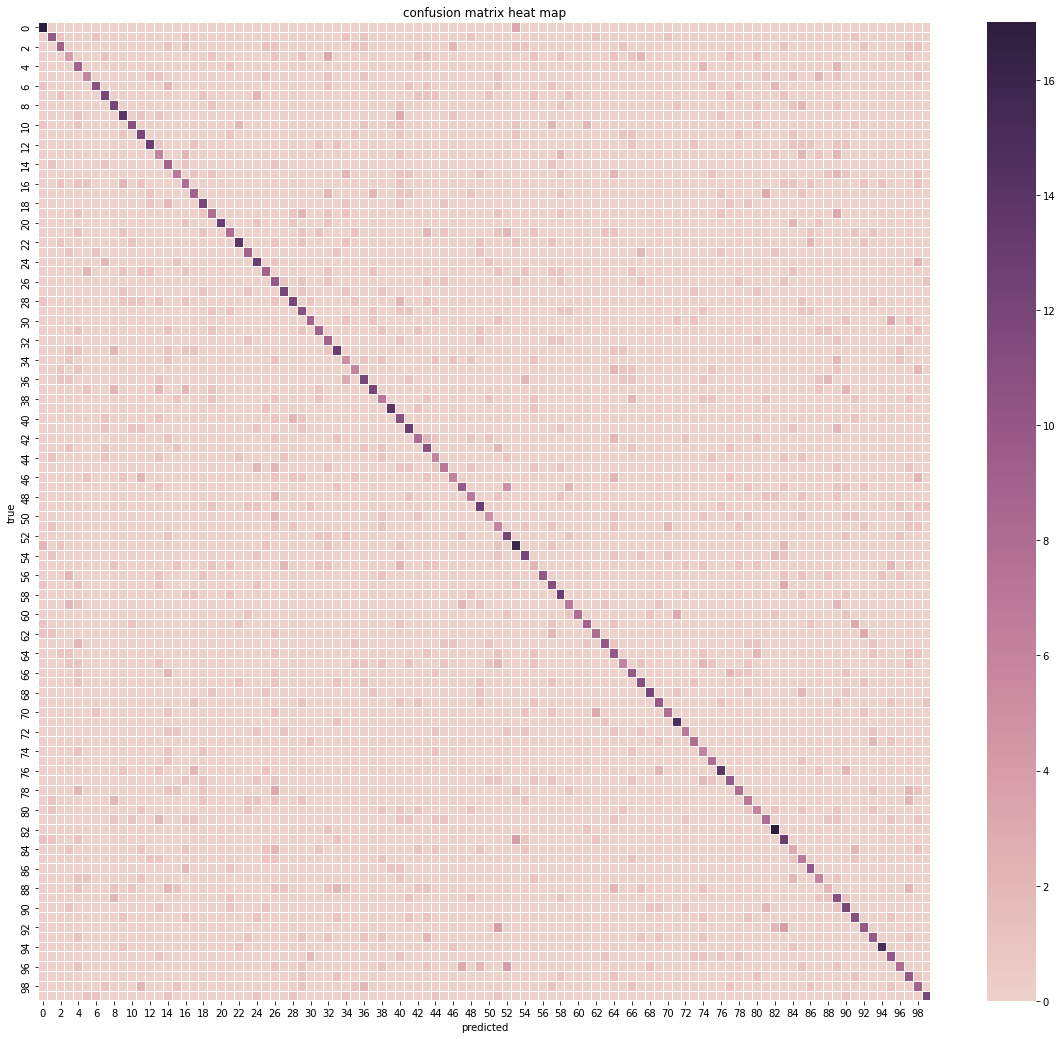

In [272]:
confusion_plot(y_test,y_pred_svm)

In [273]:
generate_classification_report(y_test,y_pred_svm)

,Label,f1-score,precision,recall,support
0,cattle,0.739130,0.850000,0.653846,26.0000
1,dinosaur,0.540541,0.526316,0.555556,18.0000
2,apple,0.439024,0.375000,0.529412,17.0000
3,boy,0.205128,0.181818,0.235294,17.0000
4,aquarium_fish,0.391304,0.642857,0.281250,32.0000
5,telephone,0.387097,0.333333,0.461538,13.0000
6,train,0.578947,0.478261,0.733333,15.0000
7,cup,0.533333,0.500000,0.571429,21.0000
8,cloud,0.545455,0.571429,0.521739,23.0000
9,elephant,0.595745,0.636364,0.560000,25.0000


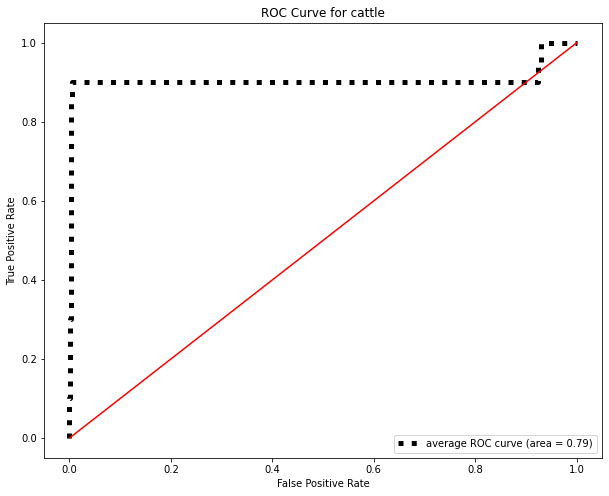

In [274]:
plot_roc_curve(y_test,proba_svm,0)

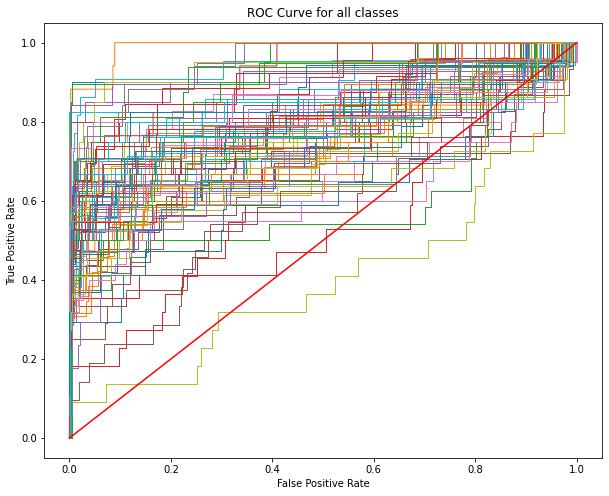

In [275]:
plot_roc_curve_all(y_test,proba_svm,100)

## Deceision Tree

In [287]:
clf_dt = DecisionTreeClassifier(criterion = "gini",
                                min_samples_split = 2)

In [288]:
clf_dt.fit(X_train_features, y_train)

DecisionTreeClassifier()

In [289]:
with open('drive/MyDrive/ML/dt_512.mdl', 'wb') as f:
    pkl.dump(clf_dt,f)
    f.close()

In [290]:
with open('drive/MyDrive/ML/dt_512.mdl', 'rb') as f:
    clf_dt = pkl.load(f)
    f.close()

In [291]:
y_eval_dt= clf_dt.predict(X_train_features)

In [292]:
accuracy_score(y_train,y_eval_dt)

0.9994

In [293]:
y_pred_dt=clf_dt.predict(X_test_features)
proba_dt = clf_dt.predict_proba(X_test_features)

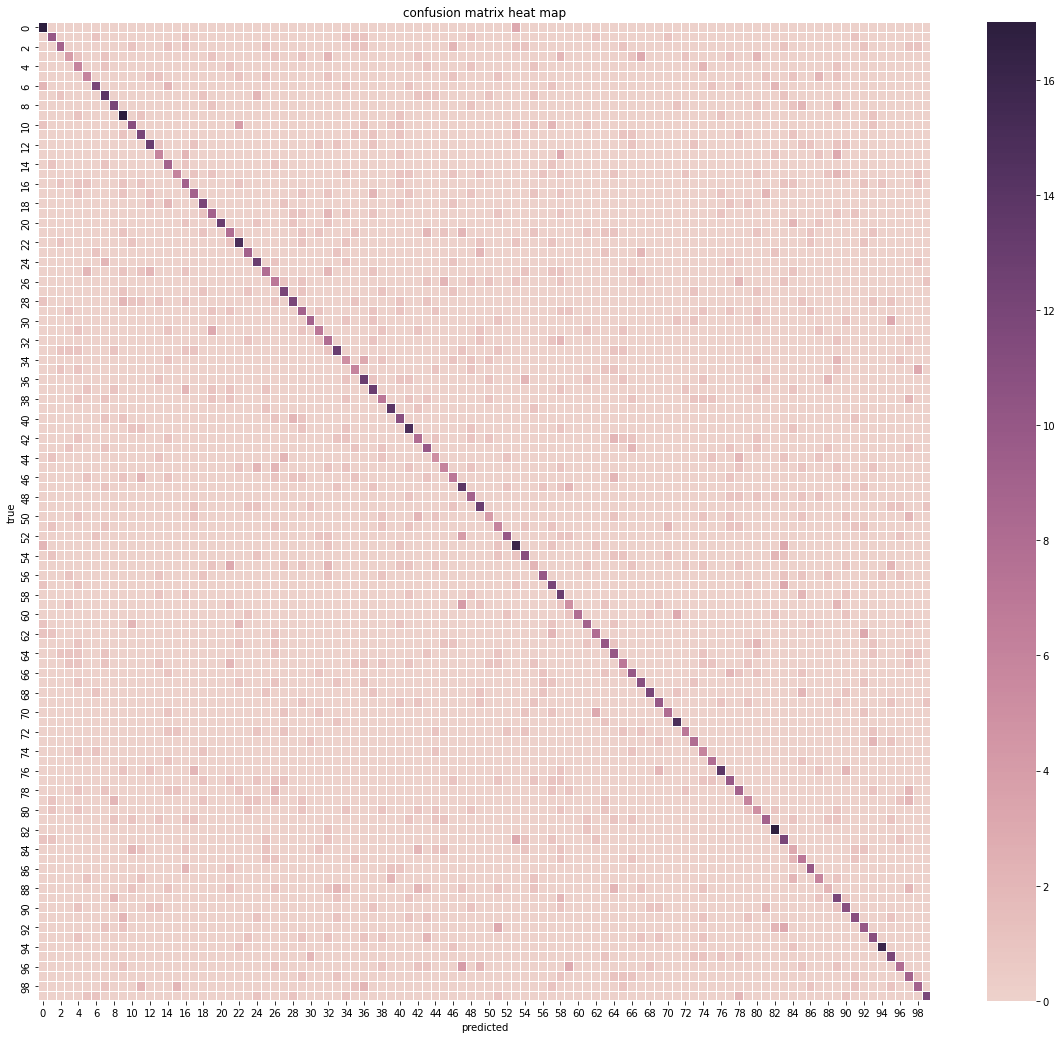

In [294]:
confusion_plot(y_test,y_pred_dt)

In [295]:
generate_classification_report(y_test,y_pred_dt)

,Label,f1-score,precision,recall,support
0,cattle,0.723404,0.850000,0.629630,27.0000
1,dinosaur,0.540541,0.526316,0.555556,18.0000
2,apple,0.461538,0.375000,0.600000,15.0000
3,boy,0.242424,0.181818,0.363636,11.0000
4,aquarium_fish,0.300000,0.428571,0.230769,26.0000
5,telephone,0.387097,0.333333,0.461538,13.0000
6,train,0.585366,0.521739,0.666667,18.0000
7,cup,0.528302,0.583333,0.482759,29.0000
8,cloud,0.600000,0.571429,0.631579,19.0000
9,elephant,0.629630,0.772727,0.531250,32.0000


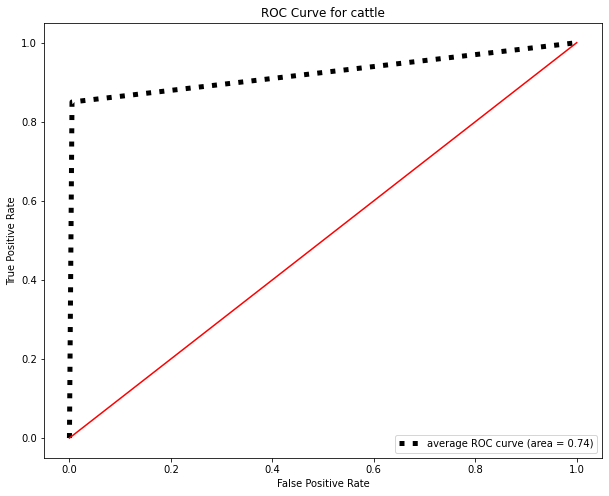

In [296]:
plot_roc_curve(y_test,proba_dt,0)

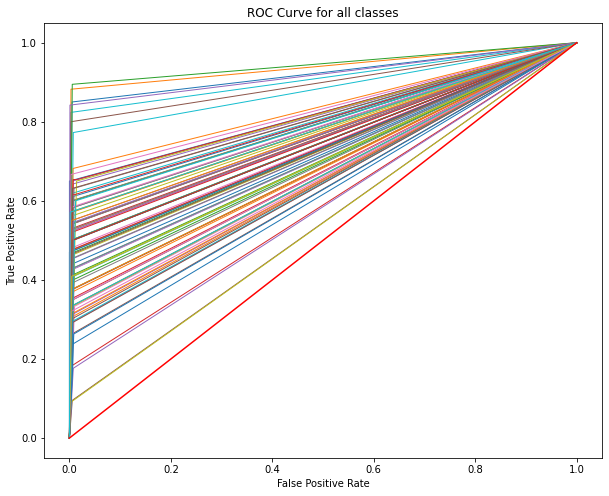

In [297]:
plot_roc_curve_all(y_test,proba_dt,num_class)